<a href="https://colab.research.google.com/github/PAVANGUBBALA/Netfilx_Data_Analysis/blob/main/EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Python Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ps
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')

**Uploading The Data_set**

In [ ]:
df=pd.read_csv("/content/netflix.csv")

In [ ]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

**Checking The number of Rows and Colomns in Data set**

In [ ]:
df.shape
print("No.of rows in the data are",df.shape[0])
print("No.of Colomns in the data are",df.shape[1])

No.of rows in the data are 8807
No.of Colomns in the data are 12


**Checking Null-values Count And Data_Types Of Colomns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Checking The Unique values And freq in Each Colomn**

In [ ]:
df.describe(include=object)

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   

                      cast        country       date_added rating  duration  \
count                 7982           7976             8797   8803      8804   
unique                7692            748             1767     17       220   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    19           2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

In [ ]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

**Checking The Missing Values**

In [ ]:
df.isna().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

**There Are 6 colomns are There With missing Values In The Data_set**

In [ ]:
(((df.isna().sum())/df.shape[0])*100).sort_values(ascending=False)

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
df["rating"].value_counts(normalize=True,ascending=False)*100

TV-MA       36.430762
TV-14       24.537090
TV-PG        9.803476
R            9.076451
PG-13        5.566284
TV-Y7        3.794161
TV-Y         3.487447
PG           3.260252
TV-G         2.499148
NR           0.908781
G            0.465750
TV-Y7-FV     0.068159
NC-17        0.034079
UR           0.034079
74 min       0.011360
84 min       0.011360
66 min       0.011360
Name: rating, dtype: float64

**Percentage Of Null_value Rows In The Paticular Colomn**

In [ ]:
X=round(df["rating"].value_counts(normalize=True,ascending=False)*100,1)

In [ ]:
Pie_chart=ps.pie(X,values=X.values,names=X.index,title="Distribution Of Rating In Netflix")
Pie_chart.show()

** Analysing The Terminologies In Top:3 Ratings_Colomn**

In [ ]:
#Analysing The Top 3 Rating's
#TV-MA - For Mature Audience Only
#TV-14 - For Children Over 14 Years Of Age Only
#TV-PG - Parental Guidance Suggested
#R - Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian

**Checking The Directors colomn For Nested values are Present or not**

In [ ]:
df[df["director"].apply(lambda x : "," in str(x))]

show_id   type                                              title  \
6         s7  Movie                   My Little Pony: A New Generation   
16       s17  Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
23       s24  Movie       Go! Go! Cory Carson: Chrissy Takes the Wheel   
30       s31  Movie                                    Ankahi Kahaniya   
68       s69  Movie                                         Schumacher   
...      ...    ...                                                ...   
8727   s8728  Movie                              When Hari Got Married   
8728   s8729  Movie                            When Two Worlds Collide   
8737   s8738  Movie                         Why Are We Getting So Fat?   
8739   s8740  Movie                 Why We Fight: The Battle of Russia   
8765   s8766  Movie                                                 XX   

                                               director  \
6                         Robert Cullen, José Luis Ucha   
16        Pedro de Echave García, Pablo Azorín Williams   
23                              Alex Woo, Stanley Moore   
30    Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...   
68    Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...   
...                                                 ...   
8727                          Ritu Sarin, Tenzing Sonam   
8728                    Heidi Brandenburg, Mathew Orzel   
8737             Milla Harrison-Hansley, Alicky Sussman   
8739                        Frank Capra, Anatole Litvak   
8765  Jovanka Vuckovic, Annie Clark, Roxanne Benjami...   

                                                   cast  \
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
16                                                  NaN   
23    Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...   
30    Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...   
68                                   Michael Schumacher   
...                                                 ...   
8727                                                NaN   
8728                                                NaN   
8737                                          Giles Yeo   
8739                                                NaN   
8765  Natalie Brown, Jonathan Watton, Melanie Lynske...   

                                   country          date_added  release_year  \
6                                      NaN  September 24, 2021          2021   
16                                     NaN  September 22, 2021          2020   
23                                     NaN  September 21, 2021          2021   
30                                     NaN  September 17, 2021          2021   
68                                     NaN  September 15, 2021          2021   
...                                    ...                 ...           ...   
8727  United Kingdom, India, United States   December 25, 2016          2013   
8728   Peru, United States, United Kingdom   November 30, 2016          2016   
8737                        United Kingdom    February 1, 2019          2016   
8739                         United States      March 31, 2017          1943   
8765                 Canada, United States       June 22, 2017          2017   

     rating duration                                          listed_in  \
6        PG   91 min                           Children & Family Movies   
16    TV-MA   67 min                Documentaries, International Movies   
23     TV-Y   61 min                           Children & Family Movies   
30    TV-14  111 min   Dramas, Independent Movies, International Movies   
68    TV-14  113 min  Documentaries, International Movies, Sports Mo...   
...     ...      ...                                                ...   
8727     NR   75 min                Documentaries, International Movies   
8728  TV-14  103 min                Documentaries, International Movies   
8737  TV-14   50 min                                      Docu

**From this we can conclude multiple director's are there for single movie**

In [ ]:
df["cast"]=df["cast"].apply(lambda i:str(i).split(", "))

In [ ]:
df_1=df.explode("cast")

In [ ]:
df_1["director"]=df_1["director"].apply(lambda i : str(i).split(", "))

In [ ]:
df_2=df_1.explode("director")

In [ ]:
df[df["listed_in"].apply(lambda x: "," in str(x))]

show_id     type                  title         director  \
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
1     [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...   South Africa   
2     [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...            NaN   
3                                                 [nan]            NaN   
4     [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...          India   
5     [Kate Siegel, Zach Gilford, Hamish Linklater, ...            NaN   
...                                                 ...            ...   
8802  [Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...  United States   
8803                                              [nan]            NaN   
8804  [Jesse Eisenberg, Woody Harrelson, Emma Stone,...  United States   
8805  [Tim Allen, Courteney Cox, Chevy Chase, Kate M...  United States   
8806  [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...          India   

              date_added  release_year rating   duration  \
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
5     September 24, 2021          2021  TV-MA   1 Season   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
5                    TV Dramas, TV Horror, TV Mysteries   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
5     The arrival of a charismatic young priest brin...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[6787 rows x 12 columns]

**From This We Can conclude There Are Nested Data in Listed_in Column Also**

In [ ]:
df_2["listed_in"]=df_2["listed_in"].apply(lambda x : str(x).split(", "))

In [ ]:
df_3=df_2.explode("listed_in")

In [ ]:
df_3.head()

show_id     type                 title         director         cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson          nan   
1      s2  TV Show         Blood & Water              nan   Ama Qamata   
1      s2  TV Show         Blood & Water              nan   Ama Qamata   
1      s2  TV Show         Blood & Water              nan   Ama Qamata   
1      s2  TV Show         Blood & Water              nan  Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...  
1               TV Dramas  After crossing paths at a party, a Cape Town t...  
1            TV Mysteries  After crossing paths at a party, a Cape Town t...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [ ]:
df_3["country"]=df_3["country"].apply(lambda x : str(x).split(", "))

In [ ]:
df_4=df_3.explode("country")

In [ ]:
df_4.shape

(201991, 12)

In [ ]:
print("No.of Rows are",df_4.shape[0])
print("No.of Columns are",df_4.shape[1])

No.of Rows are 201991
No.of Columns are 12


In [ ]:
df_4.head()

show_id     type                 title         director         cast  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson          nan   
1      s2  TV Show         Blood & Water              nan   Ama Qamata   
1      s2  TV Show         Blood & Water              nan   Ama Qamata   
1      s2  TV Show         Blood & Water              nan   Ama Qamata   
1      s2  TV Show         Blood & Water              nan  Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     90 min   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...  
1               TV Dramas  After crossing paths at a party, a Cape Town t...  
1            TV Mysteries  After crossing paths at a party, a Cape Town t...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [ ]:
df_4['director'].replace(['nan'],['Unknown Director'],inplace=True)

In [ ]:
df_4['cast'].replace(['nan'],['Unknown_cast'],inplace=True)

In [ ]:
df_4['country'].replace(['nan'],['Unknown_country'],inplace=True)

In [ ]:
data=df_4

In [ ]:
data.dropna(inplace=True)

In [ ]:
data["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
data["duration"]=data["duration"].str.replace(" min","")

In [ ]:
data["duration"].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [ ]:
data["duration_copy"]=data["duration"]

In [ ]:
data.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown_cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13         90   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

  duration_copy  
0            90  
1     2 Seasons  
1     2 Seasons  
1     2 Seasons  
1     2 Seasons

In [ ]:
data["duration"].value_counts()

1 Season     34977
2 Seasons     9485
3 Seasons     5060
94            4343
106           4040
             ...  
3                4
5                3
11               2
8                2
9                2
Name: duration, Length: 220, dtype: int64

In [ ]:
data["duration_copy"]

0              90
1       2 Seasons
1       2 Seasons
1       2 Seasons
1       2 Seasons
          ...    
8806          111
8806          111
8806          111
8806          111
8806          111
Name: duration_copy, Length: 201763, dtype: object

In [ ]:
data.loc[data["duration_copy"].str.contains("Season"),"duration_copy"]=0

In [ ]:
data["duration_copy"]=data["duration_copy"].astype('int')

In [ ]:
data["duration_copy"].unique()

array([ 90,   0,  91, 125, 104, 127,  67,  94, 161,  61, 166, 147, 103,
        97, 106, 111, 110, 105,  96, 124, 116,  98,  23, 115, 122,  99,
        88, 100, 102,  93,  95,  85,  83, 113,  13, 182,  48, 145,  87,
        92,  80, 117, 128, 119, 143, 114, 118, 108,  63, 121, 142, 154,
       120,  82, 109, 101,  86, 229,  76,  89, 156, 112, 107, 129, 135,
       136, 165, 150, 133,  70,  84, 140,  78,  64,  59, 139,  69, 148,
       189, 141, 130, 138,  81, 132, 123,  65,  68,  66,  62,  74, 131,
        39,  46,  38, 126, 155, 159, 137,  12, 273,  36,  34,  77,  60,
        49,  58,  72, 204, 212,  25,  73,  29,  47,  32,  35,  71, 149,
        33,  15,  54, 224, 162,  37,  75,  79,  55, 158, 164, 173, 181,
       185,  21,  24,  51, 151,  42,  22, 134, 177,  52,  14,  53,   8,
        57,  28,  50,   9,  26,  45, 171,  27,  44, 146,  20, 157,  17,
       203,  41,  30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208,
       180, 144,   5, 174, 170, 192, 209, 187, 172,  16, 186,  1

In [ ]:
data.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown_cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13         90   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

   duration_copy  
0             90  
1              0  
1              0  
1              0  
1              0

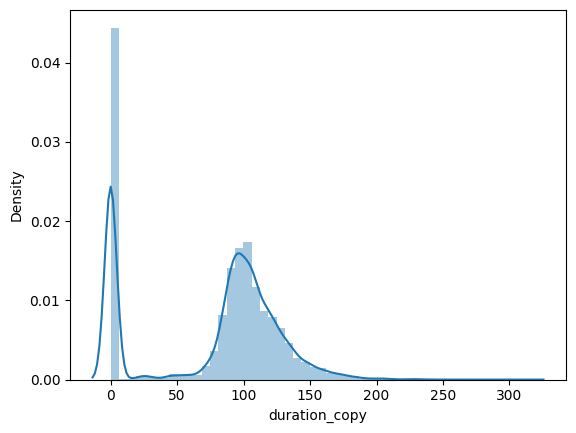

In [ ]:
sns.distplot(data["duration_copy"])
kde_kws={'linewidth': 10}

In [ ]:
bins=[-1,1,50,80,100,120,150,200,250,315]
labels=["<1","1-50","51-80","81-100","101-120","121-150","151-200","201-250","250-315"]
data["duration_copy"]=pd.cut(data["duration_copy"],bins=bins,labels=labels)

In [ ]:
data.loc[~data["duration"].str.contains("Season"),"duration"]=data.loc[~data["duration"].str.contains("Season"),"duration_copy"]

In [ ]:
data.drop("duration_copy",axis=1,inplace=True)

In [ ]:
data.head()

show_id     type                 title          director          cast  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown_cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         country          date_added  release_year rating   duration  \
0  United States  September 25, 2021          2020  PG-13     81-100   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                listed_in                                        description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...  
1               TV Dramas  After crossing paths at a party, a Cape Town t...  
1            TV Mysteries  After crossing paths at a party, a Cape Town t...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [ ]:
data.rename(columns={"title":"Title","director":"Director","cast":"Actor","country":"Country","date_added":"Date_added",
                     "Release_year":"Release_year","rating":"Rating","duration":"Duration","listed_in":"Genere","description":"Description"},inplace=True)

In [ ]:
data.head()

show_id     type                 Title          Director         Actor  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown_cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         Country          Date_added  release_year Rating   Duration  \
0  United States  September 25, 2021          2020  PG-13     81-100   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                   Genere                                        Description  
0           Documentaries  As her father nears the end of his life, filmm...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...  
1               TV Dramas  After crossing paths at a party, a Cape Town t...  
1            TV Mysteries  After crossing paths at a party, a Cape Town t...  
1  International TV Shows  After crossing paths at a party, a Cape Town t...

In [ ]:
lst=[]
for i in data["Date_added"]:
  d=parse(i)
  lst.append(d.strftime(('%Y-%m-%d')))

In [ ]:
data["Modified_Date_Added"]=lst

In [ ]:
data["Modified_Date_Added"]=pd.to_datetime(data["Modified_Date_Added"])

In [ ]:
data["Year_added"]=data["Modified_Date_Added"].dt.year
data["Month_added"]=data["Modified_Date_Added"].dt.month
data["Week_added"]=data["Modified_Date_Added"].dt.week

In [ ]:
data.head()

show_id     type                 Title          Director         Actor  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  Unknown_cast   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director    Ama Qamata   
1      s2  TV Show         Blood & Water  Unknown Director   Khosi Ngema   

         Country          Date_added  release_year Rating   Duration  \
0  United States  September 25, 2021          2020  PG-13     81-100   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   
1   South Africa  September 24, 2021          2021  TV-MA  2 Seasons   

                   Genere                                        Description  \
0           Documentaries  As her father nears the end of his life, filmm...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   
1               TV Dramas  After crossing paths at a party, a Cape Town t...   
1            TV Mysteries  After crossing paths at a party, a Cape Town t...   
1  International TV Shows  After crossing paths at a party, a Cape Town t...   

  Modified_Date_Added  Year_added  Month_added  Week_added  
0          2021-09-25        2021            9          38  
1          2021-09-24        2021            9          38  
1          2021-09-24        2021            9          38  
1          2021-09-24        2021            9          38  
1          2021-09-24        2021            9          38

**Genere wise Movie count**

In [ ]:
X=data.groupby("Genere")["Title"].nunique().sort_values(ascending=False)[:20]

Text(0, 0.5, 'Genere')

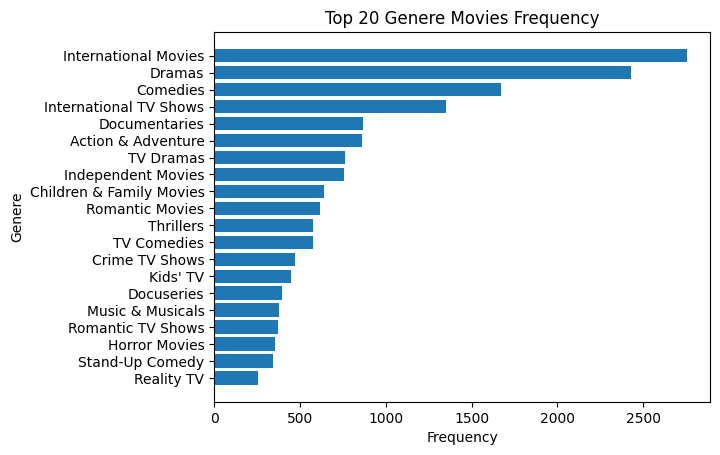

In [ ]:
plt.barh(X.index[::-1],X.values[::-1])
plt.title("Top 20 Genere Movies Frequency")
plt.xlabel("Frequency")
plt.ylabel("Genere")

In [ ]:
#The Top 5 Generes With Titles are
                                    #International Movies
                                    #Dramas
                                    #International TvShows
                                    #Documentries
                                    #Action And Adventures

In [ ]:
Type_Title_count=data.groupby("type")["Title"].nunique()
Type_Title_count

type
Movie      6126
TV Show    2664
Name: Title, dtype: int64

In [ ]:
# Pie_chart=ps.pie(X,values=X.values,names=X.index,title="Distribution Of Rating In Netflix")
# Pie_chart.show()

In [ ]:
pie_chart_2=ps.pie(Type_Title_count,values=Type_Title_count.values,names=Type_Title_count.index,title="Distribution of Movies Based on Type")
pie_chart_2.show()

In [ ]:
# Movies - Titles-69.7%
# Tv-Shows-Titles-30.3

**Titles Based On Country**

In [ ]:
data[data["Country"].apply(lambda i : "," in str(i))]

show_id   type          Title         Director                  Actor  \
1192   s1193  Movie    The Present    Farah Nabulsi            Saleh Bakri   
1192   s1193  Movie    The Present    Farah Nabulsi            Saleh Bakri   
1192   s1193  Movie    The Present    Farah Nabulsi            Maryam Kanj   
1192   s1193  Movie    The Present    Farah Nabulsi            Maryam Kanj   
1192   s1193  Movie    The Present    Farah Nabulsi    Maryam Kamiel Basha   
...      ...    ...            ...              ...                    ...   
7007   s7008  Movie  Hotel Pacific  Janusz Majewski       Joanna Kasperska   
7007   s7008  Movie  Hotel Pacific  Janusz Majewski       Joanna Kasperska   
7007   s7008  Movie  Hotel Pacific  Janusz Majewski  Jaroslava Schallerová   
7007   s7008  Movie  Hotel Pacific  Janusz Majewski  Jaroslava Schallerová   
7007   s7008  Movie  Hotel Pacific  Janusz Majewski  Jaroslava Schallerová   

              Country       Date_added  release_year Rating Duration  \
1192  United Kingdom,   March 18, 2021          2020  TV-MA     1-50   
1192  United Kingdom,   March 18, 2021          2020  TV-MA     1-50   
1192  United Kingdom,   March 18, 2021          2020  TV-MA     1-50   
1192  United Kingdom,   March 18, 2021          2020  TV-MA     1-50   
1192  United Kingdom,   March 18, 2021          2020  TV-MA     1-50   
...               ...              ...           ...    ...      ...   
7007          Poland,  October 1, 2019          1975  TV-MA   81-100   
7007          Poland,  October 1, 2019          1975  TV-MA   81-100   
7007          Poland,  October 1, 2019          1975  TV-MA   81-100   
7007          Poland,  October 1, 2019          1975  TV-MA   81-100   
7007          Poland,  October 1, 2019          1975  TV-MA   81-100   

                    Genere                                        Description  \
1192                Dramas  Yusuf and his daughter set out to buy his wife...   
1192  International Movies  Yusuf and his daughter set out to buy his wife...   
1192                Dramas  Yusuf and his daughter set out to buy his wife...   
1192  International Movies  Yusuf and his daughter set out to buy his wife...   
1192                Dramas  Yusuf and his daughter set out to buy his wife...   
...                    ...                                                ...   
7007                Dramas  A motivated teen strives to rise from dishwash...   
7007  International Movies  A motivated teen strives to rise from dishwash...   
7007        Classic Movies  A motivated teen strives to rise from dishwash...   
7007                Dramas  A motivated teen strives to rise from dishwash...   
7007  International Movies  A motivated teen strives to rise from dishwash...   

     Modified_Date_Added  Year_added  Month_added  Week_added  
1192          2021-03-18        2021            3          11  
1192          2021-03-18        2021            3          11  
1192          2021-03-18        2021            3          11  
1192          2021-03-18        2021            3          11  
1192          2021-03-18        2021            3          11  
...                  ...         ...          ...         ...  
7007          2019-10-01        2019           10          40  
7007          2019-10-01        2019           10          40  
7007          2019-10-01        2019           10          40  
7007          2019-10-01        2019           10          40  
7007          2019-10-01        2019           10          40  

[74 rows x 16 columns]

**There are some Country Names with Flaws**

In [ ]:
data["Country"]=data["Country"].str.replace(",","")

In [ ]:
data.groupby("Country").agg({"Title":"nunique"})[:25]

Title
Country              
                    2
Afghanistan         1
Albania             1
Algeria             3
Angola              1
Argentina          91
Armenia             1
Australia         158
Austria            12
Azerbaijan          1
Bahamas             1
Bangladesh          4
Belarus             1
Belgium            90
Bermuda             1
Botswana            1
Brazil             97
Bulgaria           10
Burkina Faso        1
Cambodia            6
Cameroon            1
Canada            445
Cayman Islands      2
Chile              29
China             162

In [ ]:
country_title_count=data.groupby("Country")["Title"].nunique().sort_values(ascending=False)
country_title_count

Country
United States      3681
India              1046
Unknown_country     829
United Kingdom      805
Canada              445
                   ... 
Kazakhstan            1
Jamaica               1
Slovakia              1
Somalia               1
Lithuania             1
Name: Title, Length: 124, dtype: int64

In [ ]:
country_title_coun_top5=data.groupby("Country")["Title"].nunique().sort_values(ascending=False)[:6]

In [ ]:
b=data.groupby("Country")["Title"].nunique().sort_values(ascending=False)
b=b[b.index!="Unknown_country"][:5]

In [ ]:
b

Country
United States     3681
India             1046
United Kingdom     805
Canada             445
France             393
Name: Title, dtype: int64

In [ ]:
plt.title("Top 5 Country With Title Frequency")
plt.xlabel("Frequuency")
plt.ylabel("Countries")
plt.barh(b.index[::-1],b.values[::-1])

<BarContainer object of 5 artists>

In [ ]:
#Top 5 Countries with Unique Titles
                                    #United_states
                                    #India
                                    #UnitedKingdom
                                    #Canada
                                    #France

**Number Of Unique Titles Based On Rating **

In [ ]:
C=data.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
C

Rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: Title, dtype: int64

In [ ]:
plt.title("Ratings Vs Title Frequency")
plt.xlabel("Frequuency")
plt.ylabel("Ratings")
plt.barh(C.index[::-1],C.values[::-1])

<BarContainer object of 14 artists>

**Count Of Number Of Titles Vs Duration**

In [ ]:
D=data.groupby("Duration")["Title"].nunique().sort_values(ascending=False)

In [ ]:
E=D[:10]
E

Duration
81-100       2221
1 Season     1791
101-120      1671
121-150       897
51-80         806
2 Seasons     421
1-50          286
151-200       226
3 Seasons     198
4 Seasons      94
Name: Title, dtype: int64

<BarContainer object of 10 artists>

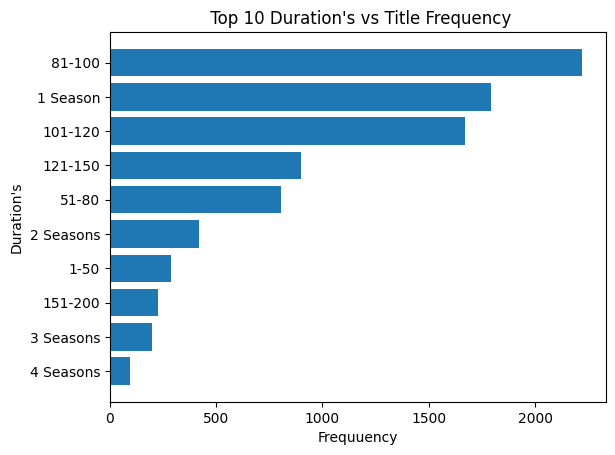

In [ ]:
plt.title(" Top 10 Duration's vs Title Frequency")
plt.xlabel("Frequuency")
plt.ylabel("Duration's")
plt.barh(E.index[::-1],E.values[::-1])

In [ ]:
#In The Data The Duration Between 80-100 mins Movies are More
#In The Data The Duration with 1-Season Are More

In [ ]:
data.columns

Index(['show_id', 'type', 'Title', 'Director', 'Actor', 'Country',
       'Date_added', 'release_year', 'Rating', 'Duration', 'Genere',
       'Description', 'Modified_Date_Added', 'Year_added', 'Month_added',
       'Week_added'],
      dtype='object')

In [ ]:
F=data.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
F=F[F.index != "Unknown_cast"]
F

Actor
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
                    ..
Jamie Luk            1
Jamie Lissow         1
Jamie Lever          1
Jamie Lee            1
Ṣọpẹ́ Dìrísù         1
Name: Title, Length: 36392, dtype: int64

In [ ]:
top_10_Actors=F[:10]

In [ ]:
plt.title(" Top 10 Actor's vs Title Frequency")
plt.xlabel("Frequuency")
plt.ylabel("Actor's_Names")
plt.barh(top_10_Actors.index[::-1],top_10_Actors.values[::-1])

<BarContainer object of 10 artists>

In [ ]:
#Top 5 Actors With More Unique Title Frequency
                                              #Anupam kher
                                              #Sharuk khan
                                              #Julie Tejaswani
                                              #Takahiro Sakurai
                                              #Naseeruddin Shah

**Based On Director's unique Titles Frequency**

In [ ]:
Directors_tittle_count=data.groupby("Director")["Title"].nunique().sort_values(ascending=False)
Directors_tittle_count=Directors_tittle_count[Directors_tittle_count.index != "Unknown Director"]
Directors_tittle_count

Director
Rajiv Chilaka              22
Jan Suter                  21
Raúl Campos                19
Suhas Kadav                16
Marcus Raboy               16
                           ..
Brandon Camp                1
Juan Antin                  1
Juan Antonio de la Riva     1
Juan Camilo Pinzon          1
Ayush Raina                 1
Name: Title, Length: 4991, dtype: int64

In [ ]:
Directors_tittle_count_top_10=Directors_tittle_count[:10]

<BarContainer object of 10 artists>

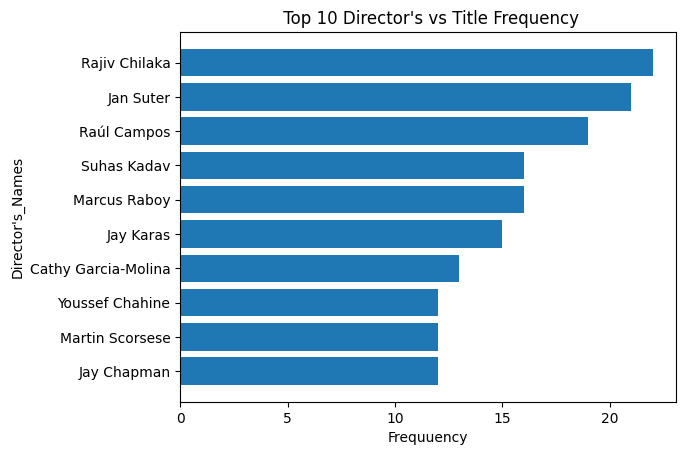

In [ ]:
plt.title(" Top 10 Director's vs Title Frequency")
plt.xlabel("Frequuency")
plt.ylabel("Director's_Names")
plt.barh(Directors_tittle_count_top_10.index[::-1],Directors_tittle_count_top_10.values[::-1])

In [ ]:
#Top 5 Directors With More Title Count
                                      #Rajiv Chilaka
                                      #JanSuter
                                      #Rahul Compos
                                      #Suhas Kadav
                                      #Marcus Raboy

**Titel's  Frequency Count Based on Year Of Release**

In [ ]:
K=data.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
K = pd.DataFrame(K)
K

Title
Year_added       
2019         2016
2020         1879
2018         1648
2021         1498
2017         1185
2016          426
2015           82
2014           24
2011           13
2013           11
2012            3
2008            2
2009            2
2010            1

In [ ]:
plt.title(" Year_Added vs Title Frequency")
plt.xlabel("Year_Added")
plt.ylabel("Frequency")
sns.lineplot(data=K,y="Title",x="Year_added")

<Axes: title={'center': ' Year_Added vs Title Frequency'}, xlabel='Year_Added', ylabel='Frequency'>

In [ ]:
#The Content Addition In Netflix is Rapidly Grown Frow 2015 - 2019
#In 2019 Due To Pandemic Content Adittion got steady Decline From Peak Point

In [ ]:
data.columns

Index(['show_id', 'type', 'Title', 'Director', 'Actor', 'Country',
       'Date_added', 'release_year', 'Rating', 'Duration', 'Genere',
       'Description', 'Modified_Date_Added', 'Year_added', 'Month_added',
       'Week_added'],
      dtype='object')

In [ ]:
L=data.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
L = pd.DataFrame(L)
L

Title
Week_added       
1             372
44            318
40            287
31            268
26            268
35            263
9             253
13            250
27            240
18            234
5             207
22            206
48            198
50            189
37            182
14            172
39            166
24            164
11            163
16            160
30            160
17            154
15            152
33            152
23            151
7             147
34            143
25            143
36            142
29            140
49            140
38            139
51            137
42            135
10            135
46            134
52            132
20            131
28            130
32            122
47            120
21            117
41            116
43            116
19            116
3             113
8             110
12            109
2             108
53            104
45             98
6              97
4              87

<Axes: title={'center': ' Week_Added vs Title Frequency'}, xlabel='Week_Added', ylabel='Frequency'>

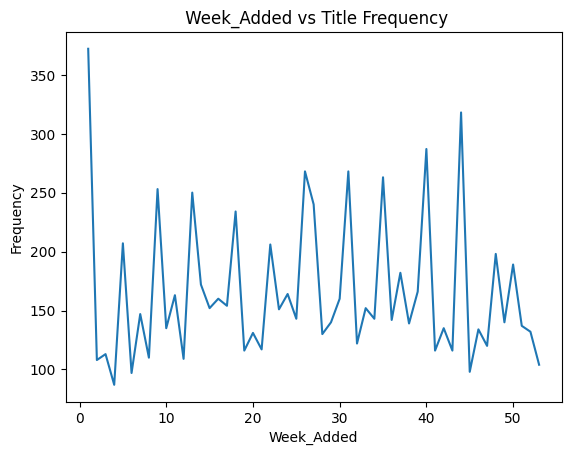

In [ ]:
plt.title(" Week_Added vs Title Frequency")
plt.xlabel("Week_Added")
plt.ylabel("Frequency")
sns.lineplot(data=L,y="Title",x="Week_added")

**Most of the Content across Netflix is added in the first week of the year and it follows a bit of a Similar pattern**

In [ ]:
M=data.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
M = pd.DataFrame(M)
M

Title
Month_added       
7              827
12             812
9              769
4              763
10             760
8              754
3              741
1              737
6              728
11             705
5              632
2              562

<Axes: title={'center': ' Month_Added vs Title Frequency'}, xlabel='Month_Added', ylabel='Frequency'>

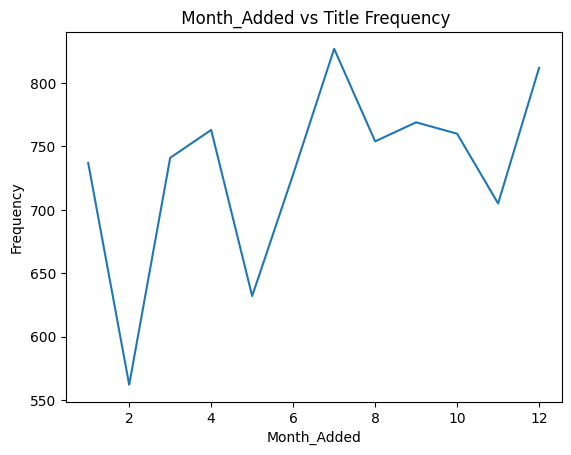

In [ ]:
plt.title(" Month_Added vs Title Frequency")
plt.xlabel("Month_Added")
plt.ylabel("Frequency")
sns.lineplot(data=M,y="Title",x="Month_added")

In [ ]:
#Most Of The Content Added In
                            #1'stMonth
                            #4th Month
                            #7th Month
                            #12th Month These are Hot month's for Content Addition

In [ ]:
data.groupby(["Country"])["Title"].nunique().sort_values(ascending=False)

Country
United States      3681
India              1046
Unknown_country     829
United Kingdom      805
Canada              445
                   ... 
Kazakhstan            1
Jamaica               1
Slovakia              1
Somalia               1
Lithuania             1
Name: Title, Length: 124, dtype: int64

In [ ]:
#univariate Analysis Of USA

In [ ]:
data_USA_Shows = data[ (data["Country"] == "United States") & (data["type"]=="TV Show") ].reset_index()
data_USA_Movies = data[ (data["Country"] == "United States") & (data["type"]=="Movie") ].reset_index()

In [ ]:
data_USA_Shows.drop("index",axis=1,inplace=True)

In [ ]:
data_USA_Movies.drop("index",axis=1,inplace=True)

In [ ]:
data_USA_Shows.head()

show_id     type              Title          Director            Actor  \
0     s16  TV Show  Dear White People  Unknown Director   Logan Browning   
1     s16  TV Show  Dear White People  Unknown Director   Logan Browning   
2     s16  TV Show  Dear White People  Unknown Director  Brandon P. Bell   
3     s16  TV Show  Dear White People  Unknown Director  Brandon P. Bell   
4     s16  TV Show  Dear White People  Unknown Director     DeRon Horton   

         Country          Date_added  release_year Rating   Duration  \
0  United States  September 22, 2021          2021  TV-MA  4 Seasons   
1  United States  September 22, 2021          2021  TV-MA  4 Seasons   
2  United States  September 22, 2021          2021  TV-MA  4 Seasons   
3  United States  September 22, 2021          2021  TV-MA  4 Seasons   
4  United States  September 22, 2021          2021  TV-MA  4 Seasons   

        Genere                                        Description  \
0  TV Comedies  Students of color navigate the daily slights a...   
1    TV Dramas  Students of color navigate the daily slights a...   
2  TV Comedies  Students of color navigate the daily slights a...   
3    TV Dramas  Students of color navigate the daily slights a...   
4  TV Comedies  Students of color navigate the daily slights a...   

  Modified_Date_Added  Year_added  Month_added  Week_added  
0          2021-09-22        2021            9          38  
1          2021-09-22        2021            9          38  
2          2021-09-22        2021            9          38  
3          2021-09-22        2021            9          38  
4          2021-09-22        2021            9          38

In [ ]:
data_USA_Movies.head()

show_id   type                 Title         Director                Actor  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson         Unknown_cast   
1      s8  Movie               Sankofa     Haile Gerima         Kofi Ghanaba   
2      s8  Movie               Sankofa     Haile Gerima         Kofi Ghanaba   
3      s8  Movie               Sankofa     Haile Gerima         Kofi Ghanaba   
4      s8  Movie               Sankofa     Haile Gerima  Oyafunmike Ogunlano   

         Country          Date_added  release_year Rating Duration  \
0  United States  September 25, 2021          2020  PG-13   81-100   
1  United States  September 24, 2021          1993  TV-MA  121-150   
2  United States  September 24, 2021          1993  TV-MA  121-150   
3  United States  September 24, 2021          1993  TV-MA  121-150   
4  United States  September 24, 2021          1993  TV-MA  121-150   

                 Genere                                        Description  \
0         Documentaries  As her father nears the end of his life, filmm...   
1                Dramas  On a photo shoot in Ghana, an American model s...   
2    Independent Movies  On a photo shoot in Ghana, an American model s...   
3  International Movies  On a photo shoot in Ghana, an American model s...   
4                Dramas  On a photo shoot in Ghana, an American model s...   

  Modified_Date_Added  Year_added  Month_added  Week_added  
0          2021-09-25        2021            9          38  
1          2021-09-24        2021            9          38  
2          2021-09-24        2021            9          38  
3          2021-09-24        2021            9          38  
4          2021-09-24        2021            9          38

**Genere Vs Title Frequency In USA For Both TV Shows & Movies**

In [ ]:
a=data_USA_Shows.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
a=pd.DataFrame(a)
a

Title
Genere                             
TV Comedies                     253
TV Dramas                       232
Kids' TV                        214
Docuseries                      191
Crime TV Shows                  145
Reality TV                      123
TV Action & Adventure            93
International TV Shows           73
TV Sci-Fi & Fantasy              59
TV Mysteries                     51
Science & Nature TV              49
Romantic TV Shows                44
TV Horror                        37
Teen TV Shows                    33
Stand-Up Comedy & Talk Shows     33
Spanish-Language TV Shows        28
TV Thrillers                     27
British TV Shows                 24
Anime Series                     18
Classic & Cult TV                15
TV Shows                          4
Korean TV Shows                   3

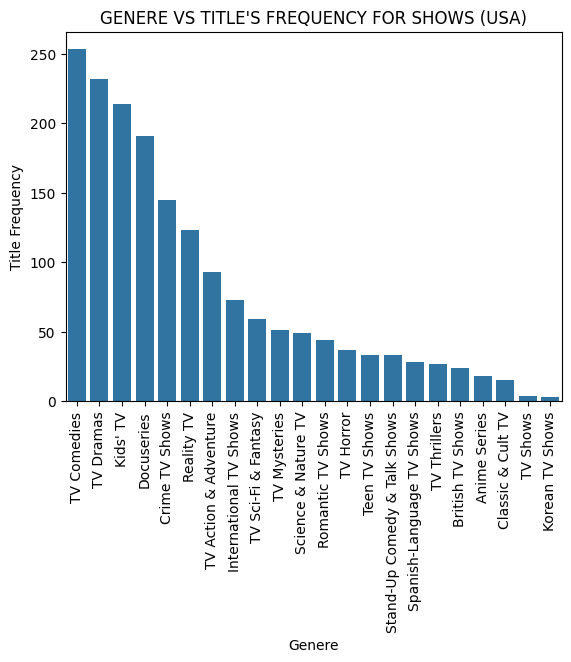

In [ ]:
sns.barplot(data=a,x="Genere",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Genere")
plt.ylabel("Title Frequency")
plt.title("GENERE VS TITLE'S FREQUENCY FOR SHOWS (USA)")
plt.show()

In [ ]:
#Top 3 geners For Shows In USA
                            #TV Comedies
                            #TV Dramas
                            #Kid's TV

In [ ]:
b=data_USA_Movies.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
b=pd.DataFrame(b)
b

Title
Genere                         
Dramas                      835
Comedies                    680
Documentaries               512
Action & Adventure          404
Independent Movies          390
Children & Family Movies    390
Thrillers                   292
Romantic Movies             225
Stand-Up Comedy             216
Horror Movies               201
Sci-Fi & Fantasy            181
International Movies        166
Music & Musicals            147
Sports Movies               113
Classic Movies               81
LGBTQ Movies                 63
Cult Movies                  52
Faith & Spirituality         42
Movies                       19
Anime Features                7

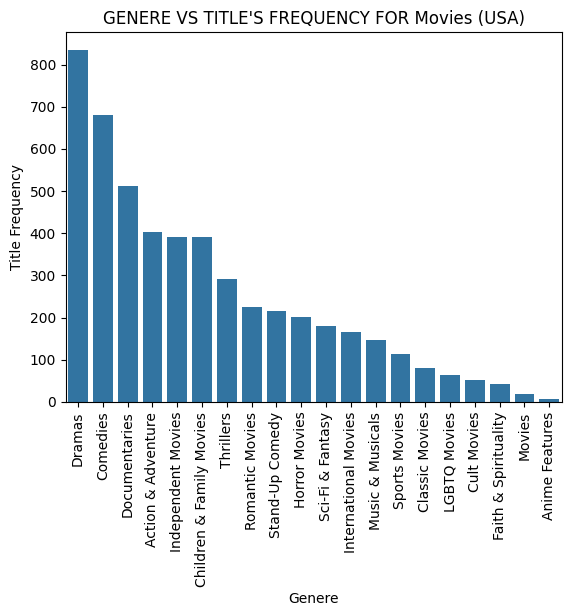

In [ ]:
sns.barplot(data=b,x="Genere",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Genere")
plt.ylabel("Title Frequency")
plt.title("GENERE VS TITLE'S FREQUENCY FOR Movies (USA)")
plt.show()

In [ ]:
#Top 3 geners For Movies In USA
                              #Dramas
                              #Comedies
                              #Documentries

In [ ]:
c=data_USA_Movies.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
c=pd.DataFrame(c)
c

Title
Rating         
TV-MA       719
R           660
PG-13       433
TV-14       276
PG          243
TV-PG       180
TV-Y7        55
TV-Y         52
TV-G         47
NR           41
G            39
TV-Y7-FV      2
NC-17         1
UR            1

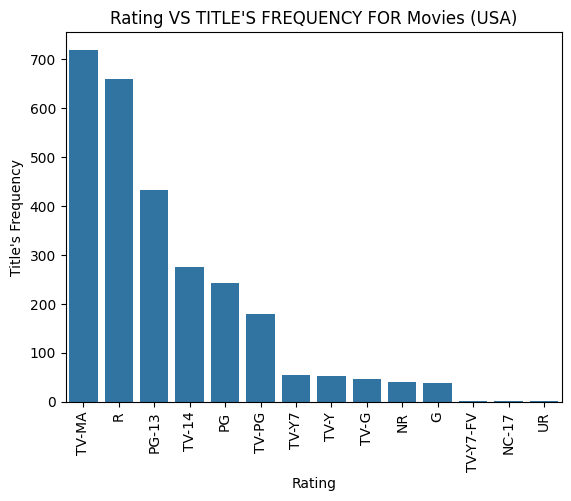

In [ ]:
sns.barplot(data=c,x="Rating",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Rating")
plt.ylabel("Title's Frequency")
plt.title("Rating VS TITLE'S FREQUENCY FOR Movies (USA)")
plt.show()

In [ ]:
#Top 3 Rating's For Movies In USA
                                #TV-MA
                                #R
                                #PG-13

In [ ]:
d=data_USA_Shows.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
d=pd.DataFrame(d)
d

Title
Rating       
TV-MA     381
TV-14     219
TV-PG     122
TV-Y7      92
TV-Y       75
TV-G       42
NR          1

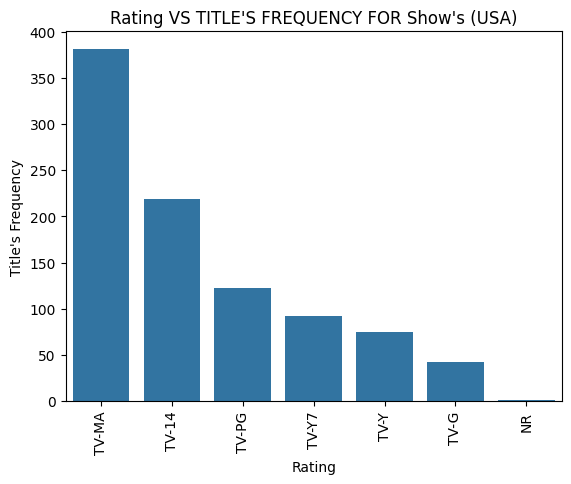

In [ ]:
sns.barplot(data=d,x="Rating",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Rating")
plt.ylabel("Title's Frequency")
plt.title("Rating VS TITLE'S FREQUENCY FOR Show's (USA)")
plt.show()

In [ ]:
#Top 3 Rating's For the show's USA
                                  #TV-MA
                                  #TV-14
                                  #Tb-PG

**From This We Can Conclude That Mature Rating Title's Are More For Both Show's and Movies  Therefore We Can Conclude In USA People Likes Mature Audience Content**

In [ ]:
e=data_USA_Shows.groupby("Duration")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Duration         
1 Season      497
2 Seasons     158
3 Seasons     102
4 Seasons      65
5 Seasons      39
6 Seasons      23
7 Seasons      19
8 Seasons      15
10 Seasons      4
9 Seasons       4
15 Seasons      2
11 Seasons      1
12 Seasons      1
13 Seasons      1
17 Seasons      1

In [ ]:
sns.barplot(data=e,x="Duration",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Duration")
plt.ylabel("Title's Frequency")
plt.title("Duration VS TITLE'S FREQUENCY FOR Show's (USA)")
plt.show()

In [ ]:
#Top 3 Duration For The Shows In US
                                  #1 season
                                  #2 Seasons
                                  #3 Seasons

In [ ]:
#In US For Shows People are More Toward's 1 Season  Duration Only

In [ ]:
f=data_USA_Movies.groupby("Duration")["Title"].nunique().sort_values(ascending=False)
f=pd.DataFrame(f)
f

Title
Duration       
81-100     1197
101-120     695
51-80       427
121-150     242
1-50        146
151-200      36
201-250       5
250-315       1

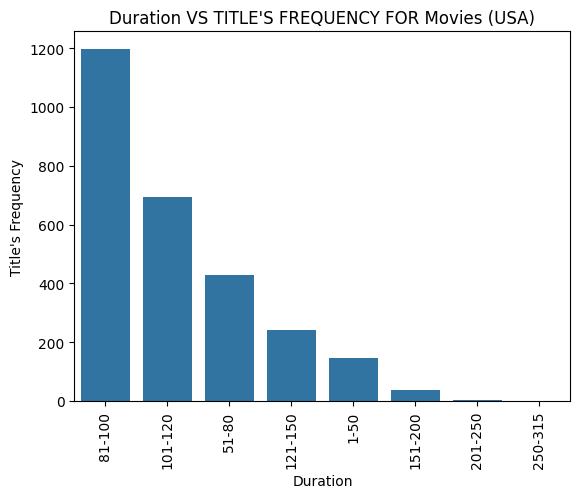

In [ ]:
sns.barplot(data=f,x="Duration",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Duration")
plt.ylabel("Title's Frequency")
plt.title("Duration VS TITLE'S FREQUENCY FOR Movies (USA)")
plt.show()

In [ ]:
#Top 3 Duration For The Movies In US
                                  #81-100
                                  #101-120
                                  #51-80

In [ ]:
#In US For Movies People are More Toward's 81-100  Duration Only

In [ ]:
g=data_USA_Movies.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
g=pd.DataFrame(g)
g=g[g.index != "Unknown_cast"][:10]
g

Title
Actor                   
Samuel L. Jackson     21
Adam Sandler          20
James Franco          19
Nicolas Cage          18
Bruce Willis          15
Seth Rogen            15
Morgan Freeman        15
Molly Shannon         15
Fred Tatasciore       15
Tara Strong           15

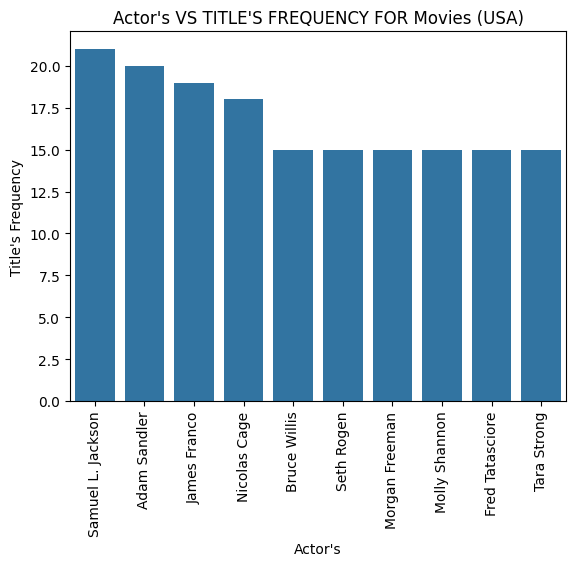

In [ ]:
sns.barplot(data=g,x="Actor",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Actor's")
plt.ylabel("Title's Frequency")
plt.title("Actor's VS TITLE'S FREQUENCY FOR Movies (USA)")
plt.show()

In [ ]:
#Top 3 Actor's (Movie's) USA Are
                                #Samuel .Jackson
                                #Adam Sander
                                #James Sander

In [ ]:
h=data_USA_Shows.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
h=pd.DataFrame(h)
h=h[h.index != "Unknown_cast"][:10]
h

Title
Actor                   
Grey Griffin          10
Vincent Tong           8
Kari Wahlgren          7
Steven Yeun            7
Mike Colter            7
Johnny Yong Bosch      7
Tom Kenny              7
Tara Strong            7
Ashleigh Ball          6
Sean Astin             6

In [ ]:
sns.barplot(data=h,x="Actor",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Actor's")
plt.ylabel("Title's Frequency")
plt.title("Actor's VS TITLE'S FREQUENCY FOR Show's (USA)")
plt.show()

In [ ]:
#Top 3 Actor's (Show's) USA Are
                                #Grey Griffin
                                #Vincent Tong
                                #Kari Wahlgren

In [ ]:
i=data_USA_Shows.groupby("Director")["Title"].nunique().sort_values(ascending=False)
i=pd.DataFrame(i)
i=i[i.index != "Unknown Director"][:10]
i

Title
Director                     
Ken Burns                   3
Stan Lathan                 2
Joe Berlinger               2
Rob Seidenglanz             2
Lynn Novick                 2
Adrián García Bogliano      1
Phil Sgriccia               1
Peter McDonnell             1
Oscar Micheaux              1
Oliver Stone                1

In [ ]:
sns.barplot(data=i,x="Director",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Director's")
plt.ylabel("Title's Frequency")
plt.title("Director's VS TITLE'S FREQUENCY FOR Show's (USA)")
plt.show()

In [ ]:
#Top 3 Director's (Show's) USA Are
                                #Ken Burns
                                #Stan Lathan
                                #Joe Berlinger

In [ ]:
j=data_USA_Movies.groupby("Director")["Title"].nunique().sort_values(ascending=False)
j=pd.DataFrame(j)
j=j[j.index != "Unknown Director"][:10]
j

Title
Director                
Jay Karas             15
Marcus Raboy          14
Jay Chapman           12
Martin Scorsese       12
Steven Spielberg      11
Don Michael Paul      10
Shannon Hartman        9
Robert Rodriguez       8
Troy Miller            8
Quentin Tarantino      7

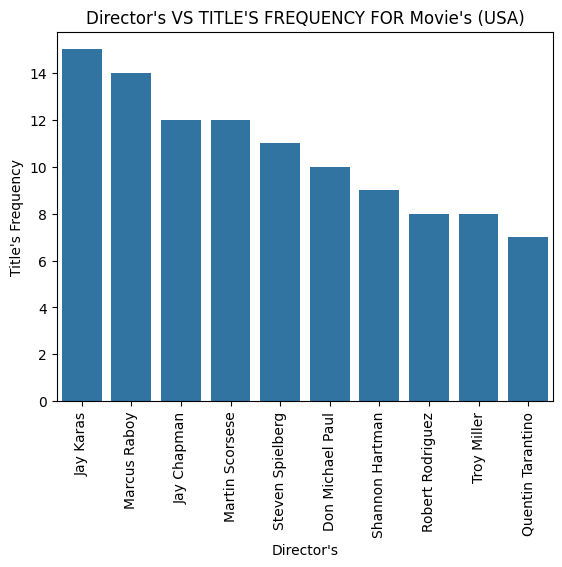

In [ ]:
sns.barplot(data=j,x="Director",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Director's")
plt.ylabel("Title's Frequency")
plt.title("Director's VS TITLE'S FREQUENCY FOR Movie's (USA)")
plt.show()

In [ ]:
k=data_USA_Movies.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
k=pd.DataFrame(k)
k

Title
Year_added       
2019          678
2020          582
2018          455
2021          452
2017          363
2016          137
2015           41
2014           18
2011           12
2013            5
2012            3
2008            1
2009            1
2010            1

In [ ]:
sns.lineplot(data=k,x="Year_added",y="Title")
plt.xlabel("Year_added")
plt.ylabel("Title's Frequency")
plt.title("Year_added VS TITLE'S FREQUENCY FOR Movie's (USA)")
plt.show()

In [ ]:
l=data_USA_Shows.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
l=pd.DataFrame(l)
l

Title
Year_added       
2020          246
2019          178
2021          175
2018          145
2017           98
2016           64
2015           16
2013            5
2014            4
2008            1

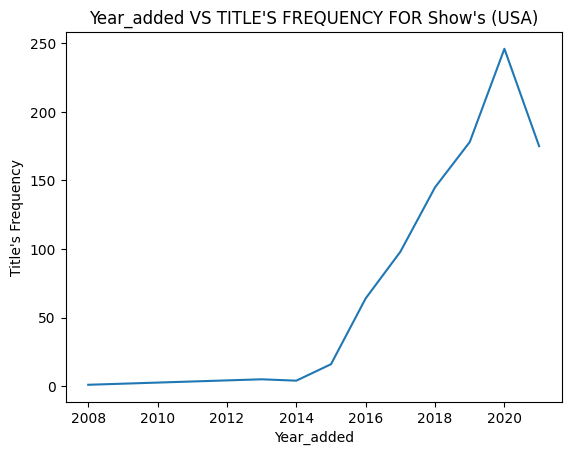

In [ ]:
sns.lineplot(data=l,x="Year_added",y="Title")
plt.xlabel("Year_added")
plt.ylabel("Title's Frequency")
plt.title("Year_added VS TITLE'S FREQUENCY FOR Show's (USA)")
plt.show()

In [ ]:
m=data_USA_Movies.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
m=pd.DataFrame(m)
m

Title
Week_added       
1             162
44            127
35            103
40             94
13             93
26             90
27             80
22             76
9              70
31             68
30             66
18             65
5              63
39             61
47             59
14             57
50             53
49             53
53             51
17             51
48             48
3              47
28             47
23             47
11             46
7              45
37             45
16             44
2              43
10             43
15             42
33             42
51             40
36             40
32             40
43             38
46             37
38             35
52             34
6              33
41             32
42             32
34             31
12             31
20             30
25             30
24             30
29             28
8              28
45             27
21             25
19             25
4              22

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=m,x="Week_added",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Week_added")
plt.ylabel("Title's Frequency")
plt.title("Week_added's VS TITLE'S FREQUENCY FOR Movie's (USA)")
plt.figure(figsize=(15,8))
plt.show()

<Figure size 1500x800 with 0 Axes>

In [ ]:
n=data_USA_Shows.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
n=pd.DataFrame(n)
n

Title
Week_added       
53             34
44             30
5              28
26             27
27             27
39             25
24             25
37             25
35             24
50             22
51             21
46             21
36             21
40             20
33             20
1              20
15             20
32             20
20             19
31             18
14             18
49             18
8              18
25             18
2              18
42             17
4              17
38             16
30             16
11             16
12             16
6              15
29             15
23             15
9              15
47             15
18             15
52             14
45             14
7              14
22             14
16             13
43             13
17             13
19             13
48             12
13             12
41             11
21             11
3               9
28              9
34              8
10              7

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=n,x="Week_added",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Week_added")
plt.ylabel("Title's Frequency")
plt.title("Week_added's VS TITLE'S FREQUENCY FOR Show's (USA)")
plt.show()

In [ ]:
data_USA_Shows.columns

Index(['show_id', 'type', 'Title', 'Director', 'Actor', 'Country',
       'Date_added', 'release_year', 'Rating', 'Duration', 'Genere',
       'Description', 'Modified_Date_Added', 'Year_added', 'Month_added',
       'Week_added'],
      dtype='object')

In [ ]:
o=data_USA_Shows.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
o=pd.DataFrame(o)
o

Title
Month_added       
9               95
1               89
12              89
7               84
11              81
6               79
2               78
10              73
8               72
4               68
5               63
3               61

In [ ]:
sns.lineplot(data=o,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.ylabel("Title's Frequency")
plt.title("Month_added's VS TITLE'S FREQUENCY FOR Show's (USA)")
plt.show()

In [ ]:
p=data_USA_Movies.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
p=pd.DataFrame(p)
p

Title
Month_added       
1              321
11             256
7              251
9              236
10             234
8              233
4              227
12             227
3              218
6              202
5              174
2              170

In [ ]:
sns.lineplot(data=p,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.ylabel("Title's Frequency")
plt.title("Month_added's VS TITLE'S FREQUENCY FOR Movies's (USA)")
plt.show()

In [ ]:
#TV Shows are added in Netflix by a tremendous amount in July and September in USA

In [ ]:
#Movies are added in Netflix in USA by a Tremendous amount in first week/last month of current year and first month of next year
#Maybe Due To Holiday Season In USA

In [ ]:
data_USA_Movies.head()

show_id   type                 Title         Director                Actor  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson         Unknown_cast   
1      s8  Movie               Sankofa     Haile Gerima         Kofi Ghanaba   
2      s8  Movie               Sankofa     Haile Gerima         Kofi Ghanaba   
3      s8  Movie               Sankofa     Haile Gerima         Kofi Ghanaba   
4      s8  Movie               Sankofa     Haile Gerima  Oyafunmike Ogunlano   

         Country          Date_added  release_year Rating Duration  \
0  United States  September 25, 2021          2020  PG-13   81-100   
1  United States  September 24, 2021          1993  TV-MA  121-150   
2  United States  September 24, 2021          1993  TV-MA  121-150   
3  United States  September 24, 2021          1993  TV-MA  121-150   
4  United States  September 24, 2021          1993  TV-MA  121-150   

                 Genere                                        Description  \
0         Documentaries  As her father nears the end of his life, filmm...   
1                Dramas  On a photo shoot in Ghana, an American model s...   
2    Independent Movies  On a photo shoot in Ghana, an American model s...   
3  International Movies  On a photo shoot in Ghana, an American model s...   
4                Dramas  On a photo shoot in Ghana, an American model s...   

  Modified_Date_Added  Year_added  Month_added  Week_added  
0          2021-09-25        2021            9          38  
1          2021-09-24        2021            9          38  
2          2021-09-24        2021            9          38  
3          2021-09-24        2021            9          38  
4          2021-09-24        2021            9          38

**Analysing Director - Actor Combination on Movies (USA)**

In [ ]:
data_USA_Movies["Director_Actor_Combo"]=data_USA_Movies["Director"].str.cat(data_USA_Movies["Actor"] ,sep=" & ")
data_USA_Movies=data_USA_Movies[~data_USA_Movies['Director_Actor_Combo'].str.contains('Unknown_cast|Unknown Director')]
data_USA_Movies["Director_Actor_Combo"]

1               Haile Gerima & Kofi Ghanaba
2               Haile Gerima & Kofi Ghanaba
3               Haile Gerima & Kofi Ghanaba
4        Haile Gerima & Oyafunmike Ogunlano
5        Haile Gerima & Oyafunmike Ogunlano
                        ...                
45809        Peter Hewitt & Spencer Breslin
45810               Peter Hewitt & Rip Torn
45811               Peter Hewitt & Rip Torn
45812           Peter Hewitt & Kevin Zegers
45813           Peter Hewitt & Kevin Zegers
Name: Director_Actor_Combo, Length: 44876, dtype: object

In [ ]:
q=data_USA_Movies.groupby("Director_Actor_Combo")["Title"].nunique().sort_values(ascending=False)
q=pd.DataFrame(q)
q

Title
Director_Actor_Combo                    
Robert Rodriguez & Alexa PenaVega      5
Leslie Small & Kevin Hart              5
Ishi Rudell & Tara Strong              5
Ishi Rudell & Tabitha St. Germain      5
Ishi Rudell & Rebecca Shoichet         5
...                                  ...
Harvey Lowry & Paula Trickey           1
Harvey Lowry & Michael Draper          1
Harvey Lowry & Kelsey Tucker           1
Harvey Lowry & JoeDon Rooney           1
Àlex Pastor & Ron McClary              1

[22204 rows x 1 columns]

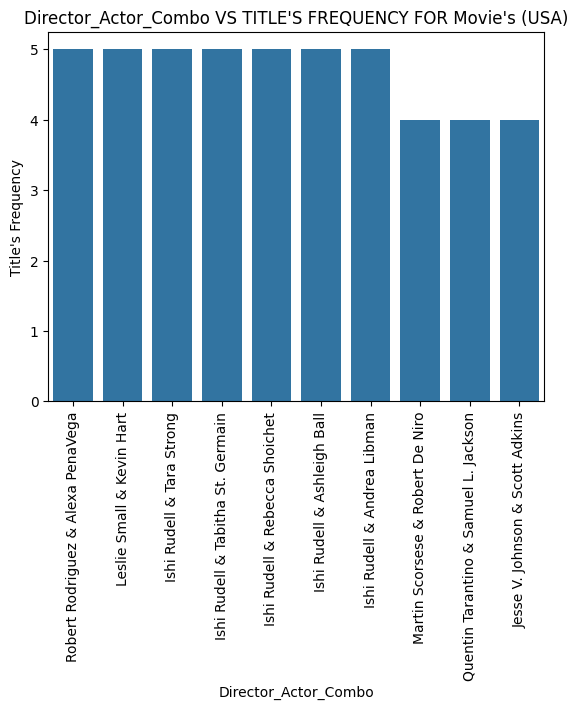

In [ ]:
sns.barplot(data=q[:10],x="Director_Actor_Combo",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Director_Actor_Combo")
plt.ylabel("Title's Frequency")
plt.title("Director_Actor_Combo VS TITLE'S FREQUENCY FOR Movie's (USA)")
plt.show()

In [ ]:
data_USA_Shows["Director_Actor_Combo"]=data_USA_Shows["Director"].str.cat(data_USA_Shows["Actor"] ,sep=" & ")
data_USA_Shows=data_USA_Shows[~data_USA_Shows['Director_Actor_Combo'].str.contains('Unknown_cast|Unknown Director')]
data_USA_Shows["Director_Actor_Combo"]

366              Glen Winter & Grant Gustin
367              Glen Winter & Grant Gustin
368              Glen Winter & Grant Gustin
369            Glen Winter & Candice Patton
370            Glen Winter & Candice Patton
                        ...                
12770    Jay Chandrasekhar & Campbell Scott
12771    Jay Chandrasekhar & Brooke D'Orsay
12772    Jay Chandrasekhar & Brooke D'Orsay
12773     Jay Chandrasekhar & Dieter Riesle
12774     Jay Chandrasekhar & Dieter Riesle
Name: Director_Actor_Combo, Length: 894, dtype: object

In [ ]:
r=data_USA_Shows.groupby("Director_Actor_Combo")["Title"].nunique().sort_values(ascending=False)
r=pd.DataFrame(r)
r

Title
Director_Actor_Combo                        
Stan Lathan & Dave Chappelle               2
Alan Poul & Adil Dehbi                     1
Laïla Marrakchi & Elyes Aguis              1
Laïla Marrakchi & Damian Nueva Cortes      1
Laïla Marrakchi & Benjamin Biolay          1
...                                      ...
Everardo Gout & Nicholas Wittman           1
Everardo Gout & Jihae                      1
Everardo Gout & Cosima Shaw                1
Everardo Gout & Clémentine Poidatz         1
Vikramaditya Motwane & Saif Ali Khan       1

[397 rows x 1 columns]

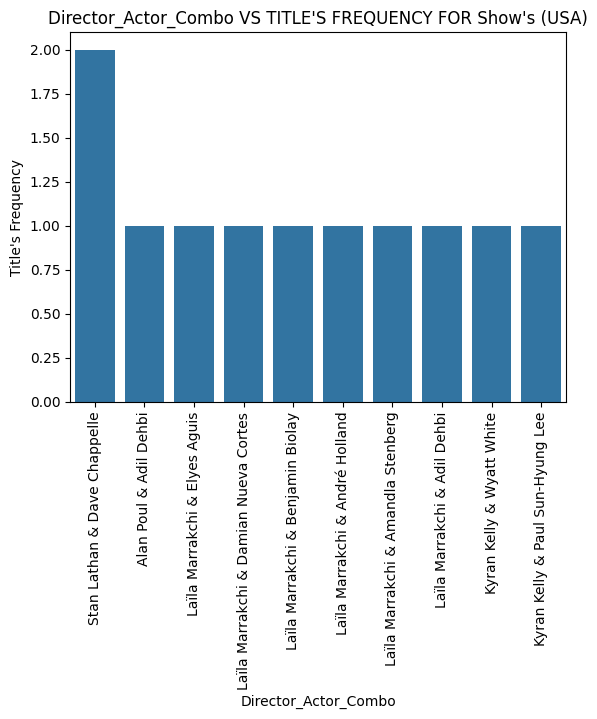

In [ ]:
sns.barplot(data=r[:10],x="Director_Actor_Combo",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Director_Actor_Combo")
plt.ylabel("Title's Frequency")
plt.title("Director_Actor_Combo VS TITLE'S FREQUENCY FOR Show's (USA)")
plt.show()

In [ ]:
#The Popular Director Actor Combination in USA For Shows
                                                          #stanlathan & Dave Chappalle
                                                          #Alan Poul & Adil Dehbi
                                                          # Laïla Marrakchi & Elyes Aguis
                                                          # Laïla Marrakchi & Damian Nueva Cortes
                                                          # Laïla Marrakchi & Benjamin Biolay
#The Popular Director Actor Combination in USA For movies
                                                          #Robert Rodriguez & Alexa PenaVega
                                                          #Leslie Small & Kevin Hart
                                                          # Ishi Rudell & Tara Strong
                                                          # Ishi Rudell & Tabitha St. Germain	5
                                                          # Ishi Rudell & Rebecca Shoichet

**Analysis On India **

In [ ]:
data_india_shows=data[(data["Country"] == "India") & (data["type"]=="TV Show")].reset_index()
data_india_shows

index show_id     type            Title          Director  \
0         4      s5  TV Show     Kota Factory  Unknown Director   
1         4      s5  TV Show     Kota Factory  Unknown Director   
2         4      s5  TV Show     Kota Factory  Unknown Director   
3         4      s5  TV Show     Kota Factory  Unknown Director   
4         4      s5  TV Show     Kota Factory  Unknown Director   
...     ...     ...      ...              ...               ...   
1398   8775   s8776  TV Show  Yeh Meri Family  Unknown Director   
1399   8775   s8776  TV Show  Yeh Meri Family  Unknown Director   
1400   8775   s8776  TV Show  Yeh Meri Family  Unknown Director   
1401   8775   s8776  TV Show  Yeh Meri Family  Unknown Director   
1402   8775   s8776  TV Show  Yeh Meri Family  Unknown Director   

               Actor Country          Date_added  release_year Rating  \
0         Mayur More   India  September 24, 2021          2021  TV-MA   
1         Mayur More   India  September 24, 2021          2021  TV-MA   
2         Mayur More   India  September 24, 2021          2021  TV-MA   
3     Jitendra Kumar   India  September 24, 2021          2021  TV-MA   
4     Jitendra Kumar   India  September 24, 2021          2021  TV-MA   
...              ...     ...                 ...           ...    ...   
1398       Ruhi Khan   India     August 31, 2018          2018  TV-PG   
1399    Prasad Reddy   India     August 31, 2018          2018  TV-PG   
1400    Prasad Reddy   India     August 31, 2018          2018  TV-PG   
1401  Revathi Pillai   India     August 31, 2018          2018  TV-PG   
1402  Revathi Pillai   India     August 31, 2018          2018  TV-PG   

       Duration                  Genere  \
0     2 Seasons  International TV Shows   
1     2 Seasons       Romantic TV Shows   
2     2 Seasons             TV Comedies   
3     2 Seasons  International TV Shows   
4     2 Seasons       Romantic TV Shows   
...         ...                     ...   
1398   1 Season             TV Comedies   
1399   1 Season  International TV Shows   
1400   1 Season             TV Comedies   
1401   1 Season  International TV Shows   
1402   1 Season             TV Comedies   

                                            Description Modified_Date_Added  \
0     In a city of coaching centers known to train I...          2021-09-24   
1     In a city of coaching centers known to train I...          2021-09-24   
2     In a city of coaching centers known to train I...          2021-09-24   
3     In a city of coaching centers known to train I...          2021-09-24   
4     In a city of coaching centers known to train I...          2021-09-24   
...                                                 ...                 ...   
1398  In the summer of 1998, middle child Harshu bal...          2018-08-31   
1399  In the summer of 1998, middle child Harshu bal...          2018-08-31   
1400  In the summer of 1998, middle child Harshu bal...          2018-08-31   
1401  In the summer of 1998, middle child Harshu bal...          2018-08-31   
1402  In the summer of 1998, middle child Harshu bal...          2018-08-31   

      Year_added  Month_added  Week_added  
0           2021            9          38  
1           2021            9          38  
2           2021            9          38  
3           2021            9          38  
4           2021            9          38  
...          ...          ...         ...  
1398        2018            8          35  
1399        2018            8          35  
1400        2018            8          35  
1401        2018            8          35  
1402        2018            8          35  

[1403 rows x 17 columns]

In [ ]:
data_india_movies=data[(data["Country"] == "India") & (data["type"]=="Movie")].reset_index()
data_india_movies

index show_id   type   Title     Director                   Actor  \
0         24     s25  Movie   Jeans   S. Shankar               Prashanth   
1         24     s25  Movie   Jeans   S. Shankar               Prashanth   
2         24     s25  Movie   Jeans   S. Shankar               Prashanth   
3         24     s25  Movie   Jeans   S. Shankar  Aishwarya Rai Bachchan   
4         24     s25  Movie   Jeans   S. Shankar  Aishwarya Rai Bachchan   
...      ...     ...    ...     ...          ...                     ...   
21406   8806   s8807  Movie  Zubaan  Mozez Singh          Anita Shabdish   
21407   8806   s8807  Movie  Zubaan  Mozez Singh          Anita Shabdish   
21408   8806   s8807  Movie  Zubaan  Mozez Singh   Chittaranjan Tripathy   
21409   8806   s8807  Movie  Zubaan  Mozez Singh   Chittaranjan Tripathy   
21410   8806   s8807  Movie  Zubaan  Mozez Singh   Chittaranjan Tripathy   

      Country          Date_added  release_year Rating Duration  \
0       India  September 21, 2021          1998  TV-14  151-200   
1       India  September 21, 2021          1998  TV-14  151-200   
2       India  September 21, 2021          1998  TV-14  151-200   
3       India  September 21, 2021          1998  TV-14  151-200   
4       India  September 21, 2021          1998  TV-14  151-200   
...       ...                 ...           ...    ...      ...   
21406   India       March 2, 2019          2015  TV-14  101-120   
21407   India       March 2, 2019          2015  TV-14  101-120   
21408   India       March 2, 2019          2015  TV-14  101-120   
21409   India       March 2, 2019          2015  TV-14  101-120   
21410   India       March 2, 2019          2015  TV-14  101-120   

                     Genere  \
0                  Comedies   
1      International Movies   
2           Romantic Movies   
3                  Comedies   
4      International Movies   
...                     ...   
21406  International Movies   
21407      Music & Musicals   
21408                Dramas   
21409  International Movies   
21410      Music & Musicals   

                                             Description Modified_Date_Added  \
0      When the father of the man she loves insists t...          2021-09-21   
1      When the father of the man she loves insists t...          2021-09-21   
2      When the father of the man she loves insists t...          2021-09-21   
3      When the father of the man she loves insists t...          2021-09-21   
4      When the father of the man she loves insists t...          2021-09-21   
...                                                  ...                 ...   
21406  A scrappy but poor boy worms his way into a ty...          2019-03-02   
21407  A scrappy but poor boy worms his way into a ty...          2019-03-02   
21408  A scrappy but poor boy worms his way into a ty...          2019-03-02   
21409  A scrappy but poor boy worms his way into a ty...          2019-03-02   
21410  A scrappy but poor boy worms his way into a ty...          2019-03-02   

       Year_added  Month_added  Week_added  
0            2021            9          38  
1            2021            9          38  
2            2021            9          38  
3            2021            9          38  
4            2021            9          38  
...           ...          ...         ...  
21406        2019            3           9  
21407        2019            3           9  
21408        2019            3           9  
21409        2019            3           9  
21410        2019            3           9  

[21411 rows x 17 columns]

In [ ]:
a=data_india_movies.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
a=pd.DataFrame(a)
a

Title
Genere                         
International Movies        864
Dramas                      662
Comedies                    323
Independent Movies          167
Action & Adventure          137
Romantic Movies             120
Music & Musicals             96
Thrillers                    92
Horror Movies                35
Documentaries                27
Children & Family Movies     26
Sports Movies                17
Sci-Fi & Fantasy             12
Classic Movies               11
Stand-Up Comedy               6
Cult Movies                   5
Faith & Spirituality          4
LGBTQ Movies                  2

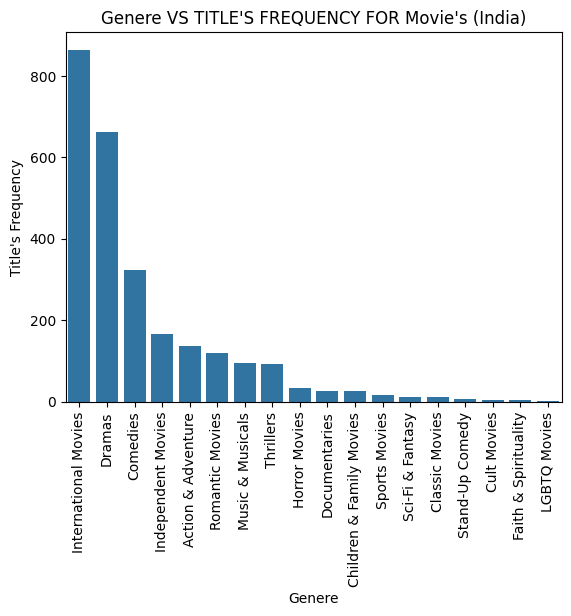

In [ ]:
sns.barplot(data=a,x="Genere",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Genere")
plt.ylabel("Title's Frequency")
plt.title("Genere VS TITLE'S FREQUENCY FOR Movie's (India)")
plt.show()

In [ ]:
            #Top 5 Generes In India Movies are
                                                #International Movies
                                                # Dramas
                                                # Comedies
                                                # Independent Movie
                                                # Action & Adventure

In [ ]:
b=data_india_shows.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
b=pd.DataFrame(b)
b

Title
Genere                             
International TV Shows           66
TV Dramas                        28
TV Comedies                      26
Kids' TV                         12
Romantic TV Shows                12
Docuseries                        9
Crime TV Shows                    9
TV Horror                         7
Reality TV                        6
TV Action & Adventure             5
TV Sci-Fi & Fantasy               3
TV Thrillers                      3
TV Shows                          3
British TV Shows                  3
Stand-Up Comedy & Talk Shows      3
TV Mysteries                      2
Teen TV Shows                     1

In [ ]:
sns.barplot(data=b,x="Genere",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Genere")
plt.ylabel("Title's Frequency")
plt.title("Genere VS TITLE'S FREQUENCY FOR Show's (India)")
plt.show()

In [ ]:
#Top 5 Generes In India Movies are
                                  # International TV Shows
                                  # TV Dramas
                                  # TV Comedies
                                  # Kids' TV
                                  # Romantic TV Shows

In [ ]:
c=data_india_shows.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
c=pd.DataFrame(c)
c

Title
Rating       
TV-MA      34
TV-14      25
TV-PG      11
TV-Y        6
TV-Y7       5
TV-G        3

In [ ]:
sns.barplot(data=c,x="Rating",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Rating")
plt.ylabel("Title's Frequency")
plt.title("Rating VS TITLE'S FREQUENCY FOR Show's (India)")
plt.show()

In [ ]:
#Top 3 Rating's in India For Shows are
                                      #TV-MA
                                      #TV-14
                                      #TV-PG

In [ ]:
d=data_india_movies.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
d=pd.DataFrame(d)
d

Title
Rating         
TV-14       547
TV-MA       232
TV-PG       133
TV-Y7        12
PG-13        11
NR            7
PG            7
TV-G          7
R             5
TV-Y7-FV      1

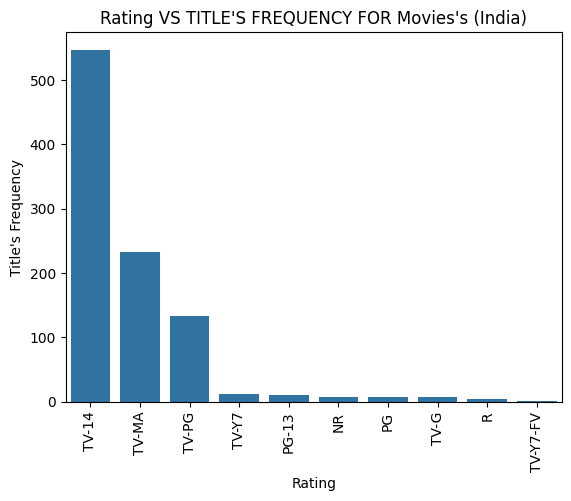

In [ ]:
sns.barplot(data=d,x="Rating",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Rating")
plt.ylabel("Title's Frequency")
plt.title("Rating VS TITLE'S FREQUENCY FOR Movies's (India)")
plt.show()

In [ ]:
#Top 3 Rating's in India For Movies are
                                        # TV-14
                                        # TV-MA
                                        # TV-PG

**In India Show's Intended for Mature Audiences while Movies for over 14 years of Age.**

In [ ]:
e=data_india_movies.groupby("Duration")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Duration       
121-150     416
101-120     250
151-200     149
81-100      106
51-80        30
1-50          6
201-250       5

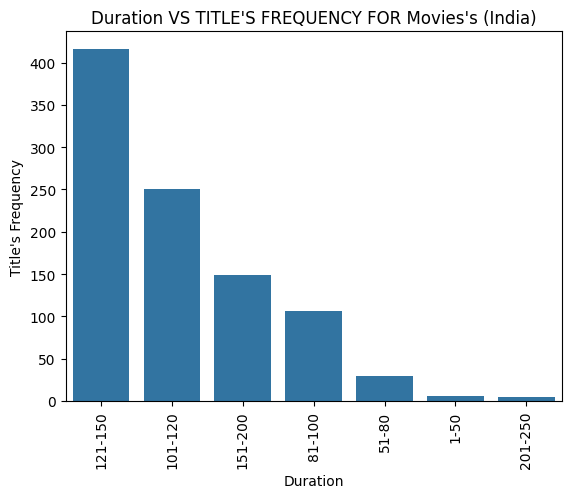

In [ ]:
sns.barplot(data=e,x="Duration",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Duration")
plt.ylabel("Title's Frequency")
plt.title("Duration VS TITLE'S FREQUENCY FOR Movies's (India)")
plt.show()

In [ ]:
#Top 3 Duration For Movie's In India Are
                                        #  121-150 MINS
                                        # 101-120 MINS
                                        # 151-200  MINS

In [ ]:
f=data_india_shows.groupby("Duration")["Title"].nunique().sort_values(ascending=False)
f=pd.DataFrame(f)
f

Title
Duration        
1 Season      73
2 Seasons      6
3 Seasons      4
4 Seasons      1

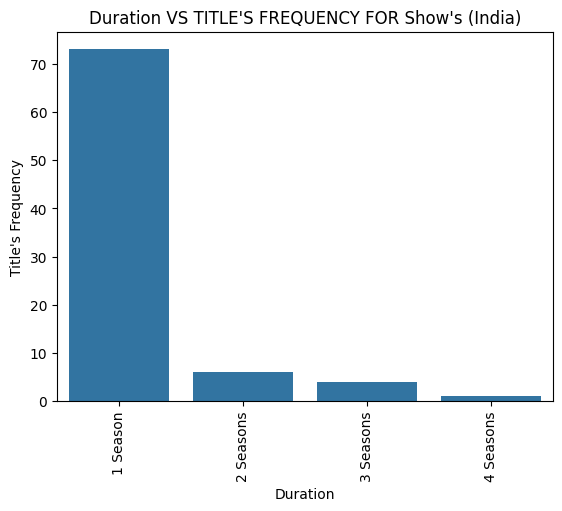

In [ ]:
sns.barplot(data=f,x="Duration",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Duration")
plt.ylabel("Title's Frequency")
plt.title("Duration VS TITLE'S FREQUENCY FOR Show's (India)")
plt.show()

In [ ]:
# Mostly The Show's In India Contains Only 1 Season

In [ ]:
g=data_india_shows.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
g=pd.DataFrame(g)
g=g[g.index != "Unknown_cast"]
g

Title
Actor                        
Nishka Raheja               3
Rajesh Kava                 3
Aranya Kaur                 2
Rajesh Tailang              2
Shanoor Mirza               2
...                       ...
Karan Suchak                1
Kanika Shivpuri             1
Kaneez Surka                1
Kamalika Guha Thakurta      1
Yogi Babu                   1

[379 rows x 1 columns]

In [ ]:
sns.barplot(data=g[:10],x="Actor",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Actor	")
plt.ylabel("Title's Frequency")
plt.title("Actor	 VS TITLE'S FREQUENCY FOR Show's (India)")
plt.show()

In [ ]:
#Top 3 Polpular Actors In Indian Shows
                                      # Nishka Raheja
                                      # Rajesh Kava
                                      # Aranya Kaur

In [ ]:
h=data_india_movies.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
h=pd.DataFrame(h)
h=h[h.index != "Unknown_cast"]
h

Title
Actor                  
Anupam Kher          40
Shah Rukh Khan       34
Naseeruddin Shah     31
Akshay Kumar         29
Om Puri              29
...                 ...
Nandhan Unni          1
Nandini Bora          1
Nandini Vaid          1
Chetan                1
Şafak Sezer           1

[3682 rows x 1 columns]

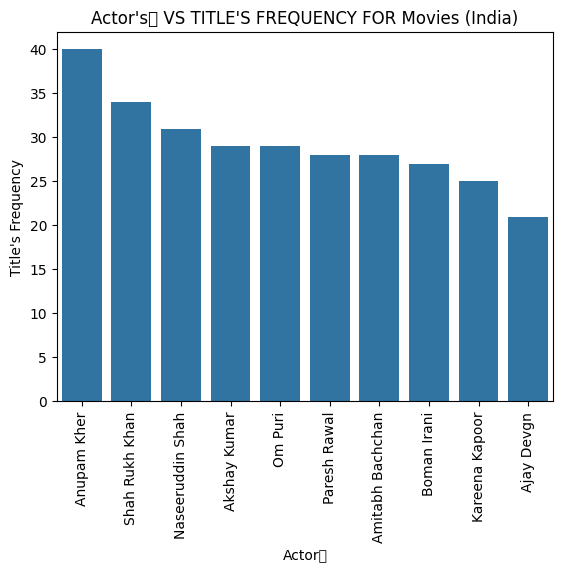

In [ ]:
sns.barplot(data=h[:10],x="Actor",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Actor	")
plt.ylabel("Title's Frequency")
plt.title("Actor's	 VS TITLE'S FREQUENCY FOR Movies (India)")
plt.show()

In [ ]:
#Top 3 Polpular Actors In Indian Movies
                                        # Anupam Kher
                                        # Shah Rukh Khan
                                        # Naseeruddin Shah

In [ ]:
i=data_india_shows.groupby("Director")["Title"].nunique().sort_values(ascending=False)
i=pd.DataFrame(i)
i=i[i.index != "Unknown Director"]
i

Title
Director                        
Gautham Vasudev Menon          2
Anurag Kashyap                 1
Nizar Shafi                    1
Vijay Roche                    1
Vignesh Shivan                 1
Vetri Maaran                   1
Vasanth Sai                    1
Tharun Bhascker Dhaassyam      1
Sudha Kongara                  1
Soumendra Padhi                1
Sarjun                         1
Sankalp Reddy                  1
Rathindran R Prasad            1
Priyadarshan                   1
Patrick Graham                 1
Nag Ashwin                     1
Arvind Swamy                   1
Moyoung Jin                    1
Karthik Subbaraj               1
Karthik Narain                 1
Hikaru Toda                    1
Fahad Mustafa                  1
Elaine McMillion Sheldon       1
Dheeraj Berry                  1
Deepti Kakkar                  1
Chico Pereira                  1
Caroline Sá                    1
Bumpy                          1
Bejoy Nambiar                  1
B. V. Nandini Reddy            1
Vikramaditya Motwane           1

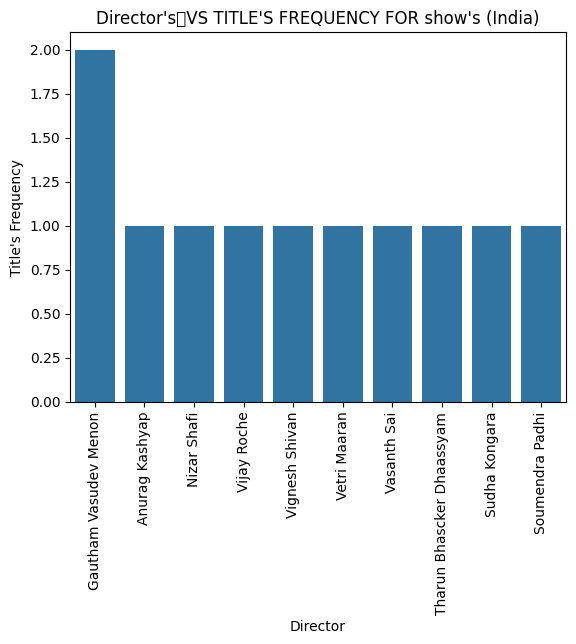

In [ ]:
sns.barplot(data=i[:10],x="Director",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Director")
plt.ylabel("Title's Frequency")
plt.title("Director's	VS TITLE'S FREQUENCY FOR show's (India)")
plt.show()

In [ ]:
#Top 5 Directors For Shows(India)
                                  # Gautham Vasudev Menon
                                  # Anurag Kashyap
                                  # Nizar Shafi
                                  # Vijay Roche
                                  # Vignesh Shivan

In [ ]:
j=data_india_movies.groupby("Director")["Title"].nunique().sort_values(ascending=False)
j=pd.DataFrame(j)
j=j[j.index != "Unknown Director"]
j

Title
Director                       
David Dhawan                  9
Umesh Mehra                   8
Anurag Kashyap                8
Dibakar Banerjee              7
Ram Gopal Varma               7
...                         ...
Moinak Biswas                 1
Ashish R. Mohan               1
Mohammed Hussain              1
Miriam Chandy Menacherry      1
Nikhil Pherwani               1

[712 rows x 1 columns]

In [ ]:
sns.barplot(data=j[:15],x="Director",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Director")
plt.ylabel("Title's Frequency")
plt.title("Director's	VS TITLE'S FREQUENCY For Movies (India)")
plt.show()

In [ ]:
# data_india_movies[data_india_movies["Director"] == "Rajiv Chilaka"]["Title"].nunique()

In [ ]:
#Top 5 Directors For Movies(India)
                                  #David Dhawan
                                  # Umesh Mehra
                                  # Anurag Kashyap
                                  # Dibakar Banerjee
                                  # Ram Gopal Varma

In [ ]:
k=data_india_movies.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
k=pd.DataFrame(k)
k

Title
Year_added       
2018          332
2019          200
2020          181
2017          148
2021           88
2016           13

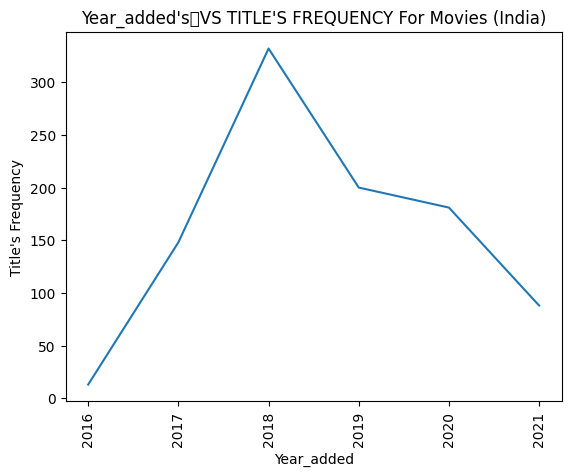

In [ ]:
sns.lineplot(data=k,x="Year_added",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Year_added")
plt.ylabel("Title's Frequency")
plt.title("Year_added's	VS TITLE'S FREQUENCY For Movies (India)")
plt.show()

In [ ]:
#In India Movies were increasingly Steadly untill 2018 (peak point)  after that started Decline In Uploads

In [ ]:
l=data_india_shows.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
l=pd.DataFrame(l)
l

Title
Year_added       
2019           18
2020           18
2018           17
2021           17
2017           14

In [ ]:
sns.lineplot(data=l,x="Year_added",y="Title")
plt.xticks(rotation="vertical")
plt.xlabel("Year_added")
plt.ylabel("Title's Frequency")
plt.title("Year_added's	VS TITLE'S FREQUENCY For show's (India)")
plt.show()

In [ ]:
#In India shows addition were increasingly Steadly

In [ ]:
m=data_india_shows.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
m=pd.DataFrame(m)
m

Title
Week_added       
13              9
15              6
22              5
37              4
40              4
14              4
18              4
7               3
9               3
21              2
35              2
42              2
31              2
48              2
49              2
52              2
16              2
12              2
11              2
10              2
19              2
50              1
39              1
47              1
45              1
41              1
51              1
1               1
38              1
34              1
33              1
32              1
29              1
2               1
26              1
24              1
20              1
8               1
27              1

In [ ]:
sns.lineplot(data=m,x="Week_added",y="Title")
plt.xlabel("Week_added")
plt.ylabel("Title's Frequency")
plt.title("Week_added's	VS TITLE'S FREQUENCY For show's (India)")
plt.show()

**In India The Best Week Slot For Shows 12-16th week  **

In [ ]:
n=data_india_movies.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
n=pd.DataFrame(n)
n

Title
Week_added       
1              89
9              64
40             63
44             58
31             43
26             40
18             36
13             33
14             33
27             33
34             30
50             29
7              28
48             25
42             22
35             21
11             20
37             19
41             18
46             16
5              15
20             14
16             14
22             14
15             13
47             11
33             11
3              11
23             10
38             10
17              9
8               9
52              8
36              7
39              7
2               7
10              6
24              6
29              6
32              5
4               5
30              5
25              5
19              5
45              4
6               4
49              4
21              4
51              4
12              3
28              3
43              2
53              1

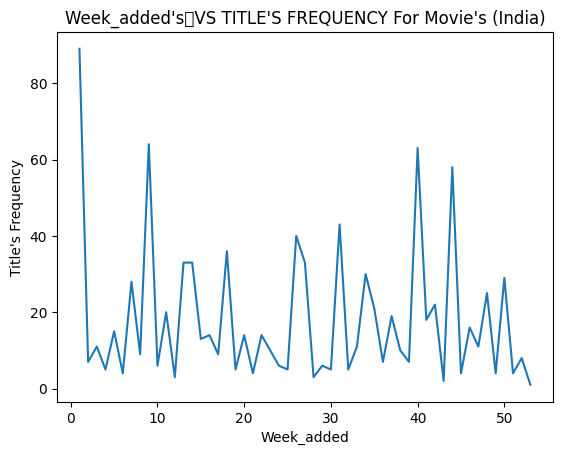

In [ ]:
sns.lineplot(data=n,x="Week_added",y="Title")
plt.xlabel("Week_added")
plt.ylabel("Title's Frequency")
plt.title("Week_added's	VS TITLE'S FREQUENCY For Movie's (India)")
plt.show()

In [ ]:
# In India The Best Week Slot For MOvies are 1,9,40,44 weeks

In [ ]:
o=data_india_movies.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
o=pd.DataFrame(o)
o

Title
Month_added       
12             113
10             104
4              100
3               97
8               91
11              91
7               78
1               69
9               66
5               56
2               55
6               42

In [ ]:
sns.lineplot(data=o,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.ylabel("Title's Frequency")
plt.title("Month_added's	VS TITLE'S FREQUENCY For Movie's (India)")
plt.show()

In [ ]:
## In India The Best Month Slot For MOvies are 12,10,4,3,8

In [ ]:
p=data_india_shows.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
p=pd.DataFrame(p)
p

Title
Month_added       
4               17
3               13
5                9
6                7
10               7
12               7
8                6
9                6
2                4
7                3
11               3
1                2

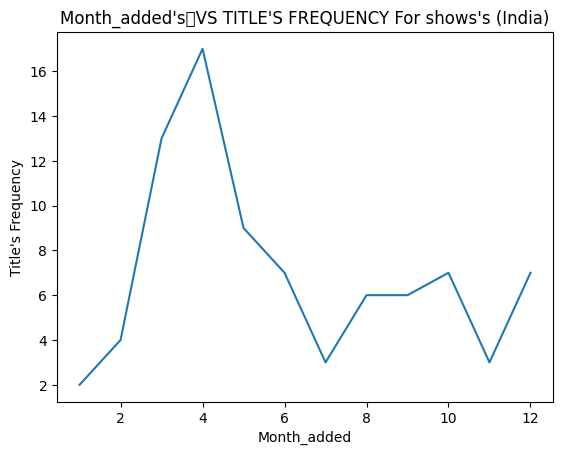

In [ ]:
sns.lineplot(data=p,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.ylabel("Title's Frequency")
plt.title("Month_added's	VS TITLE'S FREQUENCY For shows's (India)")
plt.show()

In [ ]:
# In India The Best Month Slot For Show's are 4,3,5,6 month's

In [ ]:
data_india_shows["Director_Actor_Combo"]=data_india_shows["Director"].str.cat(data_india_shows["Actor"] ,sep=" & ")
data_india_shows=data_india_shows[~data_india_shows['Director_Actor_Combo'].str.contains('Unknown_cast|Unknown Director')]
data_india_shows["Director_Actor_Combo"]

64           Bejoy Nambiar & Suriya
65            Priyadarshan & Suriya
66          Karthik Narain & Suriya
67             Vasanth Sai & Suriya
68        Karthik Subbaraj & Suriya
                   ...             
1078       Nizar Shafi & Aditi Arya
1373    Dheeraj Berry & Sanjay Keni
1374    Dheeraj Berry & Sanjay Keni
1375    Dheeraj Berry & Priya Raina
1376    Dheeraj Berry & Priya Raina
Name: Director_Actor_Combo, Length: 494, dtype: object

In [ ]:
q=data_india_shows.groupby("Director_Actor_Combo")["Title"].nunique().sort_values(ascending=False)
q=pd.DataFrame(q)
q[:10]

Title
Director_Actor_Combo                                
Gautham Vasudev Menon & Prakash Raj                2
Gautham Vasudev Menon & Anjali                     2
Gautham Vasudev Menon & Gautham Vasudev Menon      2
Sankalp Reddy & Saanve Megghana                    1
Sankalp Reddy & Uko                                1
Sankalp Reddy & Thanmayi                           1
Sankalp Reddy & Srinivas Avasarala                 1
Sankalp Reddy & Shruthi Haasan                     1
Sankalp Reddy & Satya Dev                          1
Sankalp Reddy & Sanjith Hegde                      1

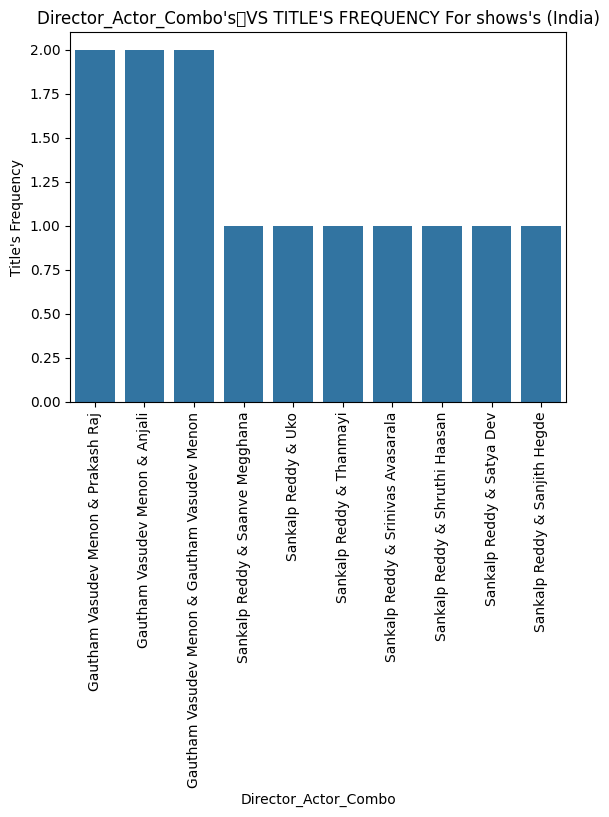

In [ ]:
sns.barplot(data=q[:10],x="Director_Actor_Combo",y="Title")
plt.xlabel("Director_Actor_Combo")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director_Actor_Combo's	VS TITLE'S FREQUENCY For shows's (India)")
plt.show()

In [ ]:
# Most poppular director_actor combo for Shows(IND)
                                                  # Gautham Vasudev Menon & Prakash Raj
                                                  # Gautham Vasudev Menon & Anjali
                                                  # Gautham Vasudev Menon & Gautham Vasudev Menon
                                                  # Sankalp Reddy & Saanve Megghana
                                                  # Sankalp Reddy & Uko
                                                  # Sankalp Reddy & Thanmayi
                                                  # Sankalp Reddy & Srinivas Avasarala
                                                  # Sankalp Reddy & Shruthi Haasan
                                                  # Sankalp Reddy & Satya Dev
                                                  # Sankalp Reddy & Sanjith Hegde

In [ ]:
data_india_movies["Director_Actor_Combo"]=data_india_movies["Director"].str.cat(data_india_movies["Actor"] ,sep=" & ")
data_india_movies=data_india_movies[~data_india_movies['Director_Actor_Combo'].str.contains('Unknown_cast|Unknown Director')]
data_india_movies["Director_Actor_Combo"]

0                     S. Shankar & Prashanth
1                     S. Shankar & Prashanth
2                     S. Shankar & Prashanth
3        S. Shankar & Aishwarya Rai Bachchan
4        S. Shankar & Aishwarya Rai Bachchan
                        ...                 
21406           Mozez Singh & Anita Shabdish
21407           Mozez Singh & Anita Shabdish
21408    Mozez Singh & Chittaranjan Tripathy
21409    Mozez Singh & Chittaranjan Tripathy
21410    Mozez Singh & Chittaranjan Tripathy
Name: Director_Actor_Combo, Length: 21268, dtype: object

In [ ]:
r=data_india_movies.groupby("Director_Actor_Combo")["Title"].nunique().sort_values(ascending=False)
r=pd.DataFrame(r)
r

Title
Director_Actor_Combo                    
David Dhawan & Anupam Kher             6
Sooraj R. Barjatya & Alok Nath         5
Sooraj R. Barjatya & Salman Khan       5
David Dhawan & Salman Khan             4
Rajiv Chilaka & Julie Tejwani          4
...                                  ...
Karan Johar & Sadashiv Amrapurkar      1
Karan Johar & Reema Lagoo              1
Karan Johar & Ranvir Shorey            1
Karan Johar & Randeep Jha              1
Zoya Akhtar & Zarina Wahab             1

[7412 rows x 1 columns]

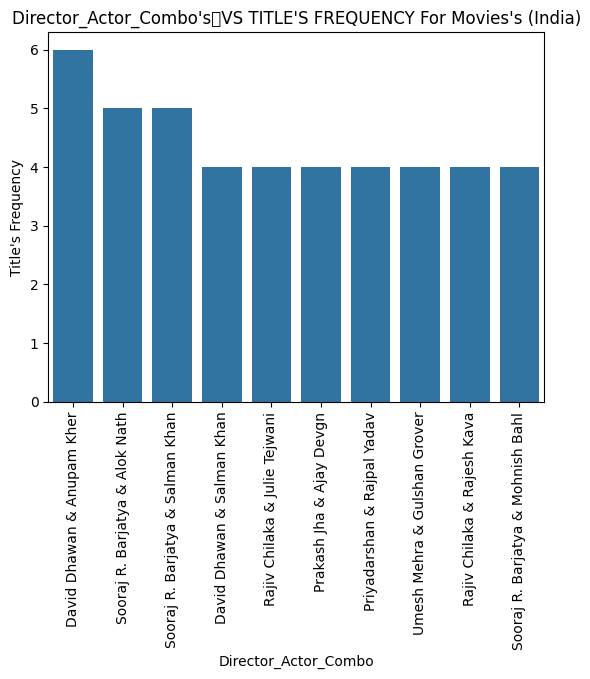

In [ ]:
sns.barplot(data=r[:10],x="Director_Actor_Combo",y="Title")
plt.xlabel("Director_Actor_Combo")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director_Actor_Combo's	VS TITLE'S FREQUENCY For Movies's (India)")
plt.show()

In [ ]:
# Most poppular director_actor combo for Movies(IND)
                                                    #David Dhawan & Anupam Kher
                                                    # Sooraj R. Barjatya & Alok Nath
                                                    # Sooraj R. Barjatya & Salman Khan
                                                    # David Dhawan & Salman Khan
                                                    # Rajiv Chilaka & Julie Tejwani
                                                    # Prakash Jha & Ajay Devgn
                                                    # Priyadarshan & Rajpal Yadav
                                                    # Umesh Mehra & Gulshan Grover
                                                    # Rajiv Chilaka & Rajesh Kava
                                                    # Sooraj R. Barjatya & Mohnish Bahl

In [ ]:
#Analysis On UK Data

In [ ]:
data_uk_movies=data[(data["Country"] == "United Kingdom") & (data["type"] == "Movie")]
data_uk_movies

show_id   type         Title      Director                Actor  \
7         s8  Movie       Sankofa  Haile Gerima         Kofi Ghanaba   
7         s8  Movie       Sankofa  Haile Gerima         Kofi Ghanaba   
7         s8  Movie       Sankofa  Haile Gerima         Kofi Ghanaba   
7         s8  Movie       Sankofa  Haile Gerima  Oyafunmike Ogunlano   
7         s8  Movie       Sankofa  Haile Gerima  Oyafunmike Ogunlano   
...      ...    ...           ...           ...                  ...   
8786   s8787  Movie  You Can Tutu   James Brown   Zahra Hassan Malik   
8786   s8787  Movie  You Can Tutu   James Brown         Cleo Badcock   
8786   s8787  Movie  You Can Tutu   James Brown       Stuart Manning   
8786   s8787  Movie  You Can Tutu   James Brown          Ali Bastian   
8786   s8787  Movie  You Can Tutu   James Brown          Amanda Holt   

             Country          Date_added  release_year Rating Duration  \
7     United Kingdom  September 24, 2021          1993  TV-MA  121-150   
7     United Kingdom  September 24, 2021          1993  TV-MA  121-150   
7     United Kingdom  September 24, 2021          1993  TV-MA  121-150   
7     United Kingdom  September 24, 2021          1993  TV-MA  121-150   
7     United Kingdom  September 24, 2021          1993  TV-MA  121-150   
...              ...                 ...           ...    ...      ...   
8786  United Kingdom   December 31, 2017          2017   TV-G   81-100   
8786  United Kingdom   December 31, 2017          2017   TV-G   81-100   
8786  United Kingdom   December 31, 2017          2017   TV-G   81-100   
8786  United Kingdom   December 31, 2017          2017   TV-G   81-100   
8786  United Kingdom   December 31, 2017          2017   TV-G   81-100   

                        Genere  \
7                       Dramas   
7           Independent Movies   
7         International Movies   
7                       Dramas   
7           Independent Movies   
...                        ...   
8786  Children & Family Movies   
8786  Children & Family Movies   
8786  Children & Family Movies   
8786  Children & Family Movies   
8786  Children & Family Movies   

                                            Description Modified_Date_Added  \
7     On a photo shoot in Ghana, an American model s...          2021-09-24   
7     On a photo shoot in Ghana, an American model s...          2021-09-24   
7     On a photo shoot in Ghana, an American model s...          2021-09-24   
7     On a photo shoot in Ghana, an American model s...          2021-09-24   
7     On a photo shoot in Ghana, an American model s...          2021-09-24   
...                                                 ...                 ...   
8786  A gifted young ballet dancer struggles to find...          2017-12-31   
8786  A gifted young ballet dancer struggles to find...          2017-12-31   
8786  A gifted young ballet dancer struggles to find...          2017-12-31   
8786  A gifted young ballet dancer struggles to find...          2017-12-31   
8786  A gifted young ballet dancer struggles to find...          2017-12-31   

      Year_added  Month_added  Week_added  
7           2021            9          38  
7           2021            9          38  
7           2021            9          38  
7           2021            9          38  
7           2021            9          38  
...          ...          ...         ...  
8786        2017           12          52  
8786        2017           12          52  
8786        2017           12          52  
8786        2017           12          52  
8786        2017           12          52  

[8580 rows x 16 columns]

In [ ]:
data_uk_shows=data[(data["Country"] == "United Kingdom") & (data["type"] == "TV Show")]
data_uk_shows

show_id     type                          Title          Director  \
8         s9  TV Show  The Great British Baking Show   Andy Devonshire   
8         s9  TV Show  The Great British Baking Show   Andy Devonshire   
8         s9  TV Show  The Great British Baking Show   Andy Devonshire   
8         s9  TV Show  The Great British Baking Show   Andy Devonshire   
8         s9  TV Show  The Great British Baking Show   Andy Devonshire   
...      ...      ...                            ...               ...   
8758   s8759  TV Show         World's Busiest Cities  Unknown Director   
8758   s8759  TV Show         World's Busiest Cities  Unknown Director   
8758   s8759  TV Show         World's Busiest Cities  Unknown Director   
8758   s8759  TV Show         World's Busiest Cities  Unknown Director   
8758   s8759  TV Show         World's Busiest Cities  Unknown Director   

             Actor         Country          Date_added  release_year Rating  \
8     Mel Giedroyc  United Kingdom  September 24, 2021          2021  TV-14   
8     Mel Giedroyc  United Kingdom  September 24, 2021          2021  TV-14   
8      Sue Perkins  United Kingdom  September 24, 2021          2021  TV-14   
8      Sue Perkins  United Kingdom  September 24, 2021          2021  TV-14   
8       Mary Berry  United Kingdom  September 24, 2021          2021  TV-14   
...            ...             ...                 ...           ...    ...   
8758    Anita Rani  United Kingdom    February 1, 2019          2017  TV-PG   
8758  Ade Adepitan  United Kingdom    February 1, 2019          2017  TV-PG   
8758  Ade Adepitan  United Kingdom    February 1, 2019          2017  TV-PG   
8758      Dan Snow  United Kingdom    February 1, 2019          2017  TV-PG   
8758      Dan Snow  United Kingdom    February 1, 2019          2017  TV-PG   

       Duration            Genere  \
8     9 Seasons  British TV Shows   
8     9 Seasons        Reality TV   
8     9 Seasons  British TV Shows   
8     9 Seasons        Reality TV   
8     9 Seasons  British TV Shows   
...         ...               ...   
8758   1 Season        Docuseries   
8758   1 Season  British TV Shows   
8758   1 Season        Docuseries   
8758   1 Season  British TV Shows   
8758   1 Season        Docuseries   

                                            Description Modified_Date_Added  \
8     A talented batch of amateur bakers face off in...          2021-09-24   
8     A talented batch of amateur bakers face off in...          2021-09-24   
8     A talented batch of amateur bakers face off in...          2021-09-24   
8     A talented batch of amateur bakers face off in...          2021-09-24   
8     A talented batch of amateur bakers face off in...          2021-09-24   
...                                                 ...                 ...   
8758  From Moscow to Mexico City, three BBC journali...          2019-02-01   
8758  From Moscow to Mexico City, three BBC journali...          2019-02-01   
8758  From Moscow to Mexico City, three BBC journali...          2019-02-01   
8758  From Moscow to Mexico City, three BBC journali...          2019-02-01   
8758  From Moscow to Mexico City, three BBC journali...          2019-02-01   

      Year_added  Month_added  Week_added  
8           2021            9          38  
8           2021            9          38  
8           2021            9          38  
8           2021            9          38  
8           2021            9          38  
...          ...          ...         ...  
8758        2019            2           5  
8758        2019            2           5  
8758        2019            2           5  
8758        2019            2           5  
8758        2019            2           5  

[4358 rows x 16 columns]

In [ ]:
a=data_uk_shows.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
a=pd.DataFrame(a)
a

Title
Genere                             
British TV Shows                224
International TV Shows          128
Docuseries                       89
Crime TV Shows                   48
Kids' TV                         43
TV Comedies                      43
Reality TV                       35
TV Dramas                        35
Science & Nature TV              27
Romantic TV Shows                11
TV Action & Adventure             9
Classic & Cult TV                 7
TV Sci-Fi & Fantasy               4
TV Mysteries                      2
TV Thrillers                      2
TV Horror                         2
Stand-Up Comedy & Talk Shows      1
Spanish-Language TV Shows         1

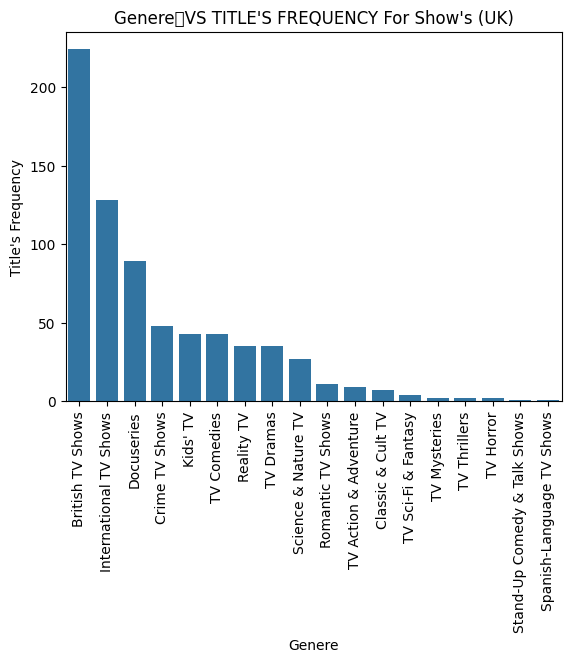

In [ ]:
sns.barplot(data=a,x="Genere",y="Title")
plt.xlabel("Genere")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Genere	VS TITLE'S FREQUENCY For Show's (UK)")
plt.show()

In [ ]:
#Top 5 Genere's For Tv_Shows In UK are
                                      #British TV Shows
                                      # International TV Shows
                                      # Docuseries
                                      # Crime TV Shows
                                      # Kids' TV

In [ ]:
b=data_uk_movies.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
b=pd.DataFrame(b)
b

Title
Genere                         
Dramas                      197
International Movies        170
Documentaries               128
Comedies                     91
Action & Adventure           84
Independent Movies           74
Thrillers                    61
Children & Family Movies     46
Romantic Movies              38
Music & Musicals             36
Sci-Fi & Fantasy             35
Horror Movies                28
Sports Movies                21
Stand-Up Comedy              21
Classic Movies               16
Cult Movies                   7
LGBTQ Movies                  7
Faith & Spirituality          5
Movies                        4

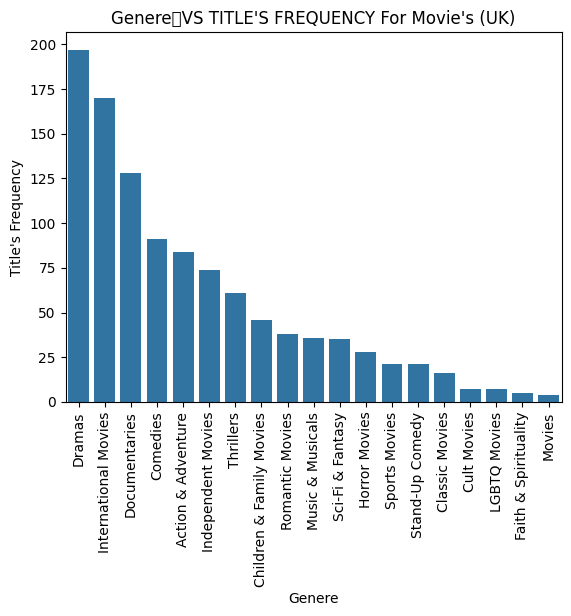

In [ ]:
sns.barplot(data=b,x="Genere",y="Title")
plt.xlabel("Genere")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Genere	VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
#Top 5 Genere's For Movie's In UK are
                                    # Dramas
                                    # International Movies
                                    # Documentaries
                                    # Comedies
                                    # Action & Adventure

In [ ]:
c=data_uk_movies.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
c=pd.DataFrame(c)
c

Title
Rating       
R         145
TV-MA     138
PG-13      84
TV-14      58
TV-PG      41
PG         35
NR         10
TV-G       10
TV-Y        5
G           4
TV-Y7       3
UR          1

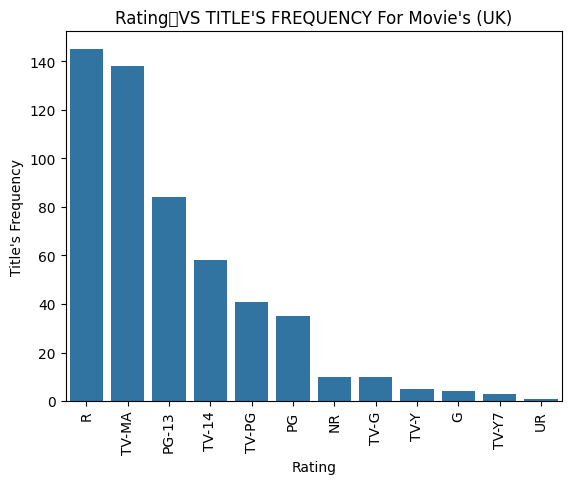

In [ ]:
sns.barplot(data=c,x="Rating",y="Title")
plt.xlabel("Rating")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Rating	VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
#Top 5 Rating's For Movie's In UK are
                                      # R
                                      # TV-MA
                                      # PG-13
                                      # TV-14
                                      # TV-PG

In [ ]:
d=data_uk_shows.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
d=pd.DataFrame(d)
d

Title
Rating       
TV-MA     114
TV-PG      57
TV-14      45
TV-Y       29
TV-G       15
TV-Y7       9
NR          2

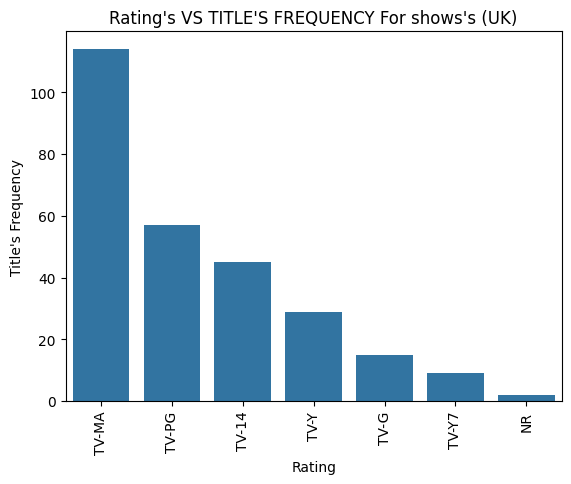

In [ ]:
sns.barplot(data=d,x="Rating",y="Title")
plt.xlabel("Rating")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Rating's VS TITLE'S FREQUENCY For shows's (UK)")
plt.show()

In [ ]:
#Top 5 Rating's For show's In UK are
                                      # TV-MA
                                      # TV-PG
                                      # TV-14
                                      # TV-Y
                                      # TV-G

In [ ]:
e=data_uk_shows.groupby("Duration")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Duration         
1 Season      164
2 Seasons      49
3 Seasons      24
4 Seasons      14
5 Seasons      12
6 Seasons       3
9 Seasons       3
10 Seasons      2

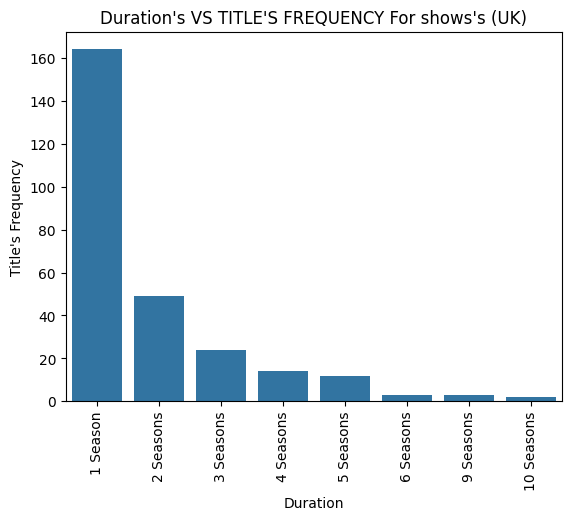

In [ ]:
sns.barplot(data=e,x="Duration",y="Title")
plt.xlabel("Duration")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Duration's VS TITLE'S FREQUENCY For shows's (UK)")
plt.show()

In [ ]:
#Top 3 Duration's For Show's In Uk Are
                                    #1 Season
                                    #2 Seasons's
                                    #3 Seasons's

In [ ]:
f=data_uk_movies.groupby("Duration")["Title"].nunique().sort_values(ascending=False)
f=pd.DataFrame(f)
f

Title
Duration       
81-100      208
101-120     155
121-150      73
51-80        60
1-50         25
151-200      10
201-250       3

In [ ]:
sns.barplot(data=f,x="Duration",y="Title")
plt.xlabel("Duration")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Duration's VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
#Top 3 Duration's For Movies's In Uk Are
                                        # 81-100
                                        # 101-120
                                        # 121-150

In [ ]:
g=data_uk_movies.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
g=pd.DataFrame(g)
g=g[g.index != "Unknown_cast"]
g

Title
Actor                      
John Cleese              11
Judi Dench                9
Michael Palin             9
Brendan Gleeson           8
Helena Bonham Carter      8
...                     ...
Ian Wright                1
Ieva Andrejevaite         1
Igal Naor                 1
Iko Uwais                 1
Ṣọpẹ́ Dìrísù              1

[2894 rows x 1 columns]

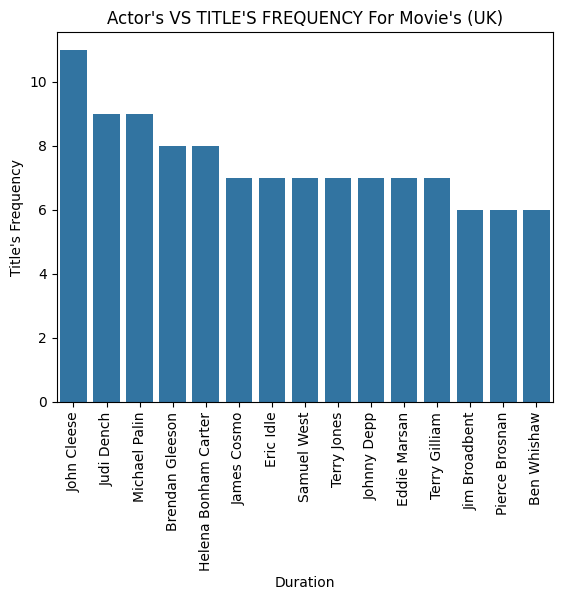

In [ ]:
sns.barplot(data=g[:15],x="Actor",y="Title")
plt.xlabel("Duration")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Actor's VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
# Top 5 Actor's In Uk (Movies)
#                             John Cleese
#                             Judi Dench
#                             Michael Palin
#                             Brendan Gleeson
#                             Helena Bonham Carter

In [ ]:
h=data_uk_shows.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
h=pd.DataFrame(h)
h=h[h.index != "Unknown_cast"]
h

Title
Actor                     
David Attenborough      13
Michael Palin            5
Eric Idle                5
Graham Chapman           5
Terry Jones              5
...                    ...
Harry Peacock            1
Harry Belafonte          1
Harrison Osterfield      1
Harold Shipman           1
İpek Erdem               1

[1313 rows x 1 columns]

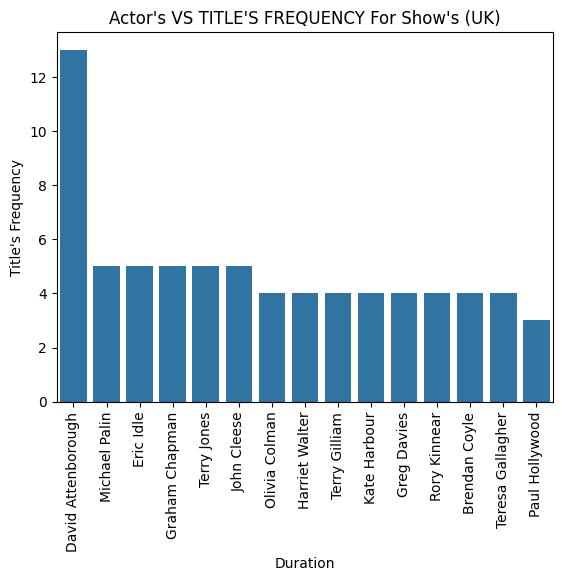

In [ ]:
sns.barplot(data=h[:15],x="Actor",y="Title")
plt.xlabel("Duration")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Actor's VS TITLE'S FREQUENCY For Show's (UK)")
plt.show()

In [ ]:
#     Top 5 Actor's In Uk (Show's)
                                  # David Attenborough
                                  # Michael Palin
                                  # Eric Idle
                                  # Graham Chapman
                                  # Terry Jones

In [ ]:
i=data_uk_shows.groupby("Director")["Title"].nunique().sort_values(ascending=False)
i=pd.DataFrame(i)
i=i[i.index != "Unknown Director"]
i

Title
Director                  
Alastair Fothergill      3
Tony Collingwood         1
Toby Haynes              1
Simon Frederick          1
Rachel Bell              1
Philippa Lowthorpe       1
Noam Murro               1
Michael Samuels          1
Michael Cumming          1
Mark Tonderai            1
Mark Lewis               1
Laïla Marrakchi          1
Juliet May               1
Jesse Vile               1
Alan Poul                1
James Hawes              1
Jakob Verbruggen         1
Jakob Schuh              1
Ian Barber               1
Houda Benyamina          1
Greg Tiernan             1
Gordon Anderson          1
Ellena Wood              1
Daniel Kontur            1
Dan Lucchesi             1
Damien Chazelle          1
Andy Devonshire          1
Ally Pankiw              1
Jani Lachauer            1

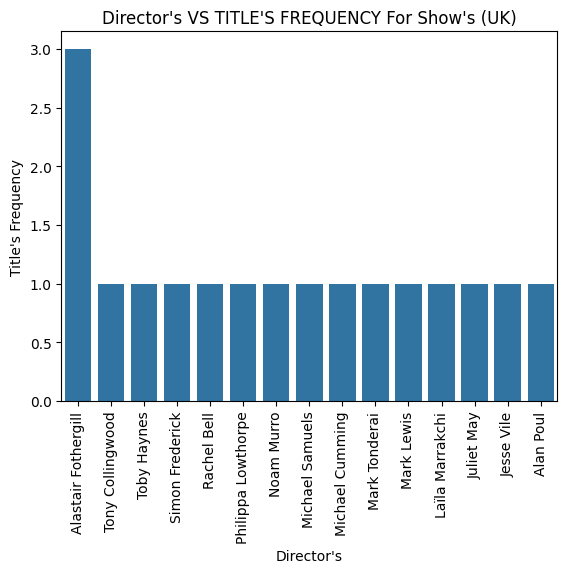

In [ ]:
sns.barplot(data=i[:15],x="Director",y="Title")
plt.xlabel("Director's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director's VS TITLE'S FREQUENCY For Show's (UK)")
plt.show()

In [ ]:
# Top 5 Director's In Uk (Show's)
                                  # Alastair Fothergill
                                  # Tony Collingwood
                                  # Toby Haynes
                                  # Simon Frederick
                                  # Rachel Bell

In [ ]:
j=data_uk_movies.groupby("Director")["Title"].nunique().sort_values(ascending=False)
j=pd.DataFrame(j)
j=j[j.index != "Unknown Director"]
j

Title
Director                    
Edward Cotterill           4
Vince Marcello             3
Orlando von Einsiedel      3
Jerry Rothwell             3
Blair Simmons              3
...                      ...
James Haslam               1
James Dearden              1
James Brown                1
Jacqui Morris              1
Zara Hayes                 1

[490 rows x 1 columns]

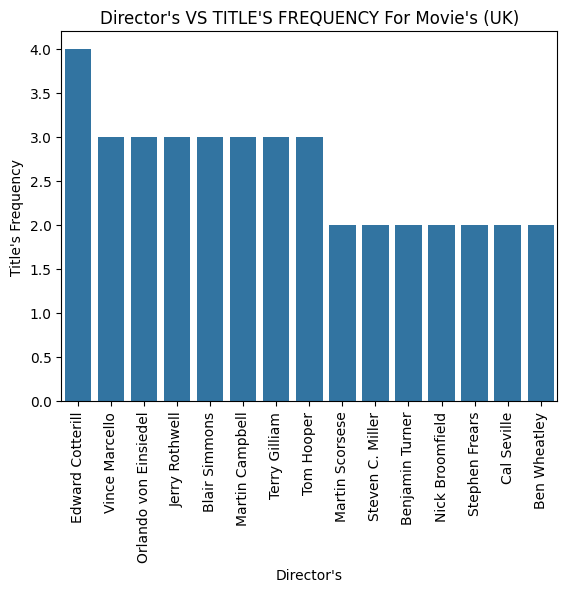

In [ ]:
sns.barplot(data=j[:15],x="Director",y="Title")
plt.xlabel("Director's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director's VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
# Top 5 Director's In Uk (Movies's)
                                  # Edward Cotterill
                                  # Vince Marcello
                                  # Orlando von Einsiedel
                                  # Jerry Rothwell
                                  # Blair Simmons

In [ ]:
k=data_uk_movies.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
k=pd.DataFrame(k)
k

Title
Year_added       
2019          131
2018          103
2020           97
2021           83
2017           81
2016           32
2014            3
2015            3
2011            1

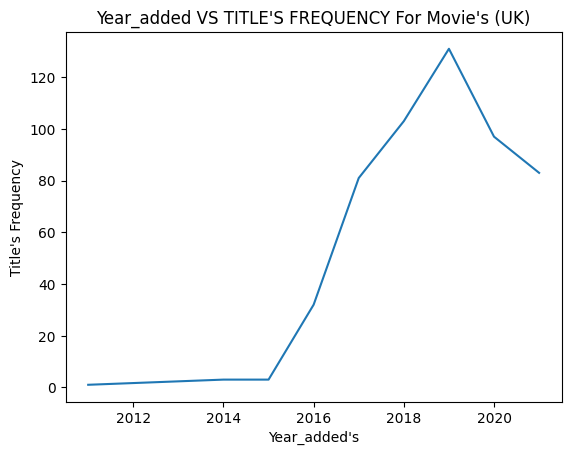

In [ ]:
sns.lineplot(data=k,x="Year_added",y="Title")
plt.xlabel("Year_added's")
plt.ylabel("Title's Frequency")
plt.title("Year_added VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
#After 2018 There is Decline in Content(Movies ) May be Due To Covid Rise

In [ ]:
l=data_uk_shows.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
l=pd.DataFrame(l)
l

Title
Year_added       
2019           60
2017           53
2020           49
2018           44
2021           37
2016           22
2015            5
2013            1

In [ ]:
sns.lineplot(data=l,x="Year_added",y="Title")
plt.xlabel("Year_added's")
plt.ylabel("Title's Frequency")
plt.title("Year_added VS TITLE'S FREQUENCY For Show's (UK)")
plt.show()

In [ ]:
#The Content Addition For Show's In Strating 2019 Was Peaked After That Satrred Decline In Content Due To Covid

In [ ]:
m=data_uk_shows.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
m=pd.DataFrame(m)
m

Title
Week_added       
13             21
31             16
5              15
40             15
35             11
37             10
27              8
11              8
30              8
39              7
14              7
20              6
51              6
49              6
48              6
26              6
1               6
17              6
12              6
9               6
36              5
22              5
50              5
45              5
42              5
2               5
28              5
52              4
4               4
38              4
19              3
41              3
8               3
18              3
10              3
21              3
29              3
34              2
6               2
46              2
25              2
16              2
7               2
15              2
53              2
43              1
44              1
47              1
24              1
23              1
3               1
33              1

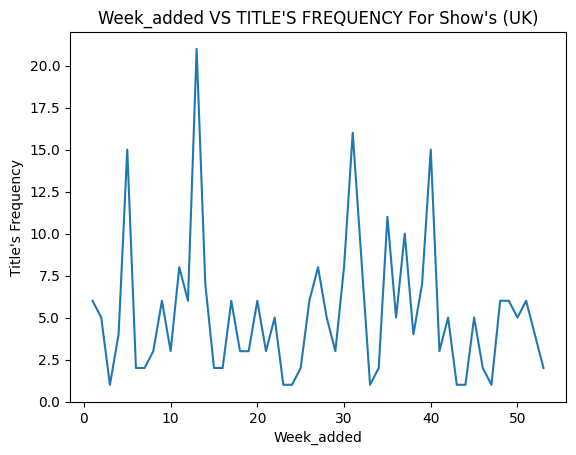

In [ ]:
sns.lineplot(data=m,x="Week_added",y="Title")
plt.xlabel("Week_added")
plt.ylabel("Title's Frequency")
plt.title("Week_added VS TITLE'S FREQUENCY For Show's (UK)")
plt.show()

In [ ]:
n=data_uk_movies.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
n=pd.DataFrame(n)
n

Title
Week_added       
1              35
44             22
40             22
13             22
31             17
22             16
30             16
5              15
17             15
35             15
26             14
9              13
36             13
8              13
43             12
7              12
3              12
18             11
11             11
42             10
48             10
27             10
38              9
51              9
39              9
16              9
15              8
25              8
52              8
50              8
14              8
32              8
33              8
37              8
49              7
23              7
28              7
19              7
2               7
34              6
12              6
20              5
41              5
6               5
46              5
47              5
4               5
29              5
21              4
53              4
10              4
24              2
45              2

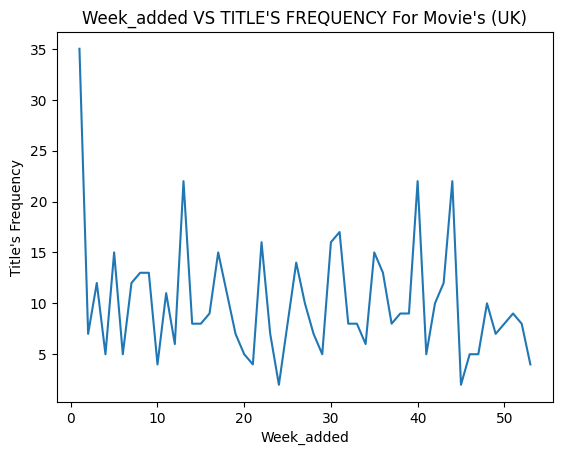

In [ ]:
sns.lineplot(data=n,x="Week_added",y="Title")
plt.xlabel("Week_added")
plt.ylabel("Title's Frequency")
plt.title("Week_added VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
o=data_uk_movies.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
o=pd.DataFrame(o)
o

Title
Month_added       
1               55
10              51
9               49
12              49
8               48
4               45
2               44
3               44
7               43
5               37
11              35
6               34

In [ ]:
sns.lineplot(data=o,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.ylabel("Title's Frequency")
plt.title("Month_added VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
p=data_uk_shows.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
p=pd.DataFrame(p)
p

Title
Month_added       
3               41
10              29
9               28
7               26
12              26
8               22
4               21
1               19
2               19
5               15
6               13
11              12

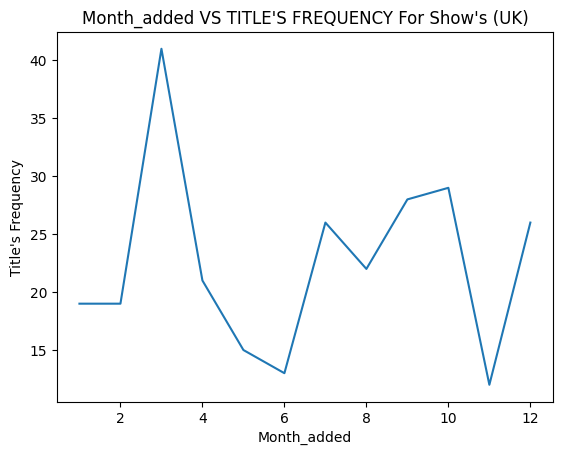

In [ ]:
sns.lineplot(data=p,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.ylabel("Title's Frequency")
plt.title("Month_added VS TITLE'S FREQUENCY For Show's (UK)")
plt.show()

In [ ]:
#In Uk TV-Show's Addition Was Peak In 3rd Month

In [ ]:
#In Uk Movie's Addition Was Peak In  First week/last month of Current year  First month of Next year

In [ ]:
data_uk_shows["Director_actor_combo"]=data_uk_shows["Director"].str.cat(data_uk_shows["Actor"],sep=" & ")
data_uk_shows=data_uk_shows[~data_uk_shows['Director_actor_combo'].str.contains('Unknown_cast|Unknown Director')]
data_uk_shows

show_id     type                          Title         Director  \
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
8         s9  TV Show  The Great British Baking Show  Andy Devonshire   
...      ...      ...                            ...              ...   
8599   s8600  TV Show                Toast of London  Michael Cumming   
8599   s8600  TV Show                Toast of London  Michael Cumming   
8599   s8600  TV Show                Toast of London  Michael Cumming   
8599   s8600  TV Show                Toast of London  Michael Cumming   
8599   s8600  TV Show                Toast of London  Michael Cumming   

                  Actor         Country          Date_added  release_year  \
8          Mel Giedroyc  United Kingdom  September 24, 2021          2021   
8          Mel Giedroyc  United Kingdom  September 24, 2021          2021   
8           Sue Perkins  United Kingdom  September 24, 2021          2021   
8           Sue Perkins  United Kingdom  September 24, 2021          2021   
8            Mary Berry  United Kingdom  September 24, 2021          2021   
...                 ...             ...                 ...           ...   
8599      Harry Peacock  United Kingdom   September 1, 2017          2015   
8599      Harry Peacock  United Kingdom   September 1, 2017          2015   
8599  Tracy Ann Oberman  United Kingdom   September 1, 2017          2015   
8599  Tracy Ann Oberman  United Kingdom   September 1, 2017          2015   
8599  Tracy Ann Oberman  United Kingdom   September 1, 2017          2015   

     Rating   Duration             Genere  \
8     TV-14  9 Seasons   British TV Shows   
8     TV-14  9 Seasons         Reality TV   
8     TV-14  9 Seasons   British TV Shows   
8     TV-14  9 Seasons         Reality TV   
8     TV-14  9 Seasons   British TV Shows   
...     ...        ...                ...   
8599  TV-MA  3 Seasons  Classic & Cult TV   
8599  TV-MA  3 Seasons        TV Comedies   
8599  TV-MA  3 Seasons   British TV Shows   
8599  TV-MA  3 Seasons  Classic & Cult TV   
8599  TV-MA  3 Seasons        TV Comedies   

                                            Description Modified_Date_Added  \
8     A talented batch of amateur bakers face off in...          2021-09-24   
8     A talented batch of amateur bakers face off in...          2021-09-24   
8     A talented batch of amateur bakers face off in...          2021-09-24   
8     A talented batch of amateur bakers face off in...          2021-09-24   
8     A talented batch of amateur bakers face off in...          2021-09-24   
...                                                 ...                 ...   
8599  After a divorce and fatal career move, a class...          2017-09-01   
8599  After a divorce and fatal career move, a class...          2017-09-01   
8599  After a divorce and fatal career move, a class...          2017-09-01   
8599  After a divorce and fatal career move, a class...          2017-09-01   
8599  After a divorce and fatal career move, a class...          2017-09-01   

      Year_added  Month_added  Week_added                 Director_actor_combo  
8           2021            9          38       Andy Devonshire & Mel Giedroyc  
8           2021            9          38       Andy Devonshire & Mel Giedroyc  
8           2021            9          38        Andy Devonshire & Sue Perkins  
8           2021            9          38        Andy Devonshire & Sue Perkins  
8           2021            9          38         Andy Devonshire & Mary Berry  
...          ...          ...         ...                                  ...  
8599        2017            9          35      Michael Cumming & Harry Peacock  
8599        2017            9          35      Michael Cumming & 

In [ ]:
data_uk_movies["Director_actor_combo"]=data_uk_movies["Director"].str.cat(data_uk_movies["Actor"],sep=" & ")
data_uk_movies=data_uk_movies[~data_uk_movies['Director_actor_combo'].str.contains('Unknown_cast|Unknown Director')]

In [ ]:
q=data_uk_movies.groupby("Director_actor_combo")["Title"].nunique().sort_values(ascending=False)
q=pd.DataFrame(q)
q

Title
Director_actor_combo                         
Vince Marcello & Molly Ringwald             3
Blair Simmons & Keith Wickham               3
Edward Cotterill & Rachael Stirling         3
Blair Simmons & Rob Rackstraw               3
Blair Simmons & Simon Greenall              3
...                                       ...
Jane Campion & Abbie Cornish                1
Jane Campion & Antonia Campbell-Hughes      1
Jane Campion & Ben Whishaw                  1
Jane Campion & Claudie Blakley              1
Zara Hayes & Rhea Perlman                   1

[3880 rows x 1 columns]

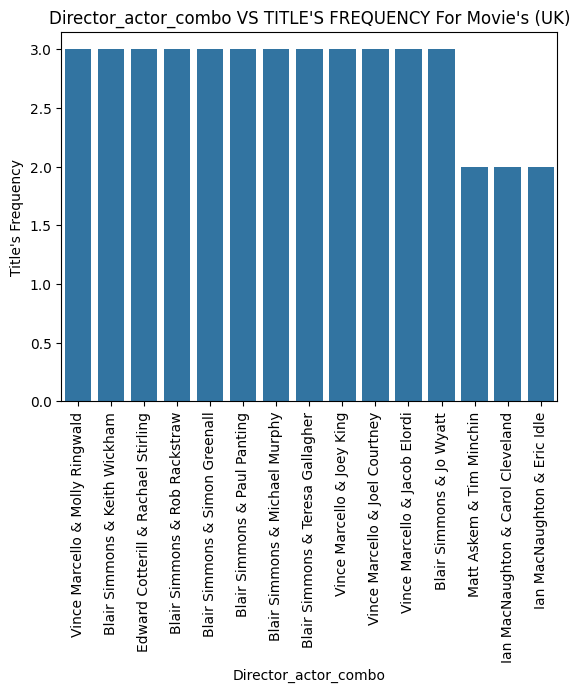

In [ ]:
sns.barplot(data=q[:15],x="Director_actor_combo",y="Title")
plt.xlabel("Director_actor_combo")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director_actor_combo VS TITLE'S FREQUENCY For Movie's (UK)")
plt.show()

In [ ]:
#top 5 Director's Actor's Combo For Movies In UK Are
                                                  # Vince Marcello & Molly Ringwald
                                                  # Blair Simmons & Keith Wickham
                                                  # Edward Cotterill & Rachael Stirling
                                                  # Blair Simmons & Rob Rackstraw
                                                  # Blair Simmons & Simon Greenall

In [ ]:
r=data_uk_shows.groupby("Director_actor_combo")["Title"].nunique().sort_values(ascending=False)
r=pd.DataFrame(r)
r

Title
Director_actor_combo                           
Alastair Fothergill & David Attenborough      3
Alan Poul & Adil Dehbi                        1
Michael Samuels & Paul Nicholls               1
Michael Samuels & Amarildo Kola               1
Michael Samuels & Anastasia Hille             1
...                                         ...
Jakob Schuh & Tamsin Greig                    1
Jakob Verbruggen & Adrian Lester              1
Jakob Verbruggen & Ben Whishaw                1
Jakob Verbruggen & Charlotte Rampling         1
Tony Collingwood & Tracey Hoyt                1

[232 rows x 1 columns]

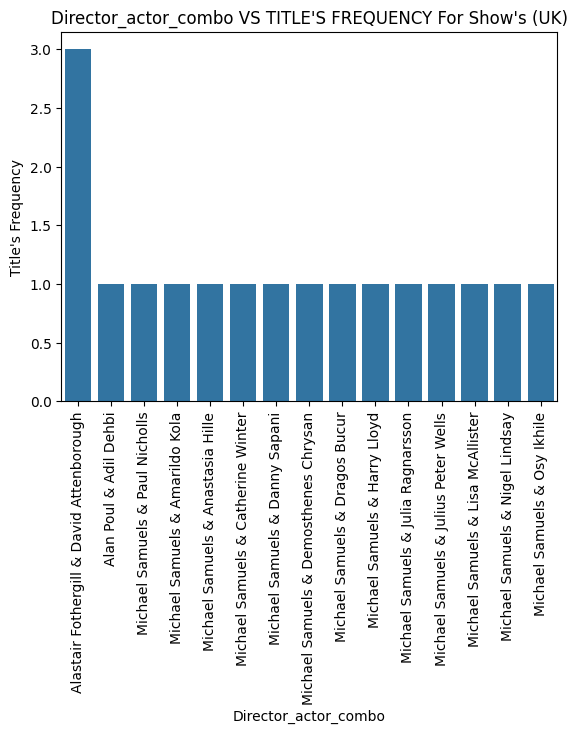

In [ ]:
sns.barplot(data=r[:15],x="Director_actor_combo",y="Title")
plt.xlabel("Director_actor_combo")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director_actor_combo VS TITLE'S FREQUENCY For Show's (UK)")
plt.show()

Analysis For Japan Data

In [ ]:
data_japan_movies=data[(data["Country"] == "Japan") & (data["type"] == "Movie")]
len(data_japan_movies)
data_japan_movies

show_id   type                    Title         Director  \
46       s47  Movie               Safe House  Daniel Espinosa   
46       s47  Movie               Safe House  Daniel Espinosa   
46       s47  Movie               Safe House  Daniel Espinosa   
46       s47  Movie               Safe House  Daniel Espinosa   
46       s47  Movie               Safe House  Daniel Espinosa   
...      ...    ...                      ...              ...   
8781   s8782  Movie  Yo-Kai Watch: The Movie      Mark Risley   
8781   s8782  Movie  Yo-Kai Watch: The Movie      Mark Risley   
8781   s8782  Movie  Yo-Kai Watch: The Movie      Mark Risley   
8781   s8782  Movie  Yo-Kai Watch: The Movie      Mark Risley   
8781   s8782  Movie  Yo-Kai Watch: The Movie      Mark Risley   

                  Actor Country          Date_added  release_year Rating  \
46    Denzel Washington   Japan  September 16, 2021          2012      R   
46        Ryan Reynolds   Japan  September 16, 2021          2012      R   
46         Vera Farmiga   Japan  September 16, 2021          2012      R   
46      Brendan Gleeson   Japan  September 16, 2021          2012      R   
46          Sam Shepard   Japan  September 16, 2021          2012      R   
...                 ...     ...                 ...           ...    ...   
8781  Melissa Hutchison   Japan    December 1, 2016          2016  TV-Y7   
8781     Paul Greenberg   Japan    December 1, 2016          2016  TV-Y7   
8781     Paul Greenberg   Japan    December 1, 2016          2016  TV-Y7   
8781  Brent Pendergrass   Japan    December 1, 2016          2016  TV-Y7   
8781  Brent Pendergrass   Japan    December 1, 2016          2016  TV-Y7   

     Duration                    Genere  \
46    101-120        Action & Adventure   
46    101-120        Action & Adventure   
46    101-120        Action & Adventure   
46    101-120        Action & Adventure   
46    101-120        Action & Adventure   
...       ...                       ...   
8781   81-100  Children & Family Movies   
8781   81-100            Anime Features   
8781   81-100  Children & Family Movies   
8781   81-100            Anime Features   
8781   81-100  Children & Family Movies   

                                            Description Modified_Date_Added  \
46    Young CIA operative Matt Weston must get a dan...          2021-09-16   
46    Young CIA operative Matt Weston must get a dan...          2021-09-16   
46    Young CIA operative Matt Weston must get a dan...          2021-09-16   
46    Young CIA operative Matt Weston must get a dan...          2021-09-16   
46    Young CIA operative Matt Weston must get a dan...          2021-09-16   
...                                                 ...                 ...   
8781  Nate's special Yo-Kai Watch is missing. He tra...          2016-12-01   
8781  Nate's special Yo-Kai Watch is missing. He tra...          2016-12-01   
8781  Nate's special Yo-Kai Watch is missing. He tra...          2016-12-01   
8781  Nate's special Yo-Kai Watch is missing. He tra...          2016-12-01   
8781  Nate's special Yo-Kai Watch is missing. He tra...          2016-12-01   

      Year_added  Month_added  Week_added  
46          2021            9          37  
46          2021            9          37  
46          2021            9          37  
46          2021            9          37  
46          2021            9          37  
...          ...          ...         ...  
8781        2016           12          48  
8781        2016           12          48  
8781        2016           12          48  
8781        2016           12          48  
8781        2016           12          48  

[3525 rows x 16 columns]

In [ ]:
data_japan_shows=data[(data["Country"] == "Japan") & (data["type"] == "TV Show")]
len(data_japan_shows)

5074

In [ ]:
a=data_japan_shows.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
a=pd.DataFrame(a)
a

Title
Genere                             
International TV Shows          150
Anime Series                    141
Kids' TV                         29
Romantic TV Shows                21
TV Dramas                        21
Crime TV Shows                   15
Teen TV Shows                    14
TV Comedies                      10
Reality TV                        9
TV Thrillers                      6
TV Action & Adventure             5
TV Horror                         5
TV Mysteries                      4
Docuseries                        2
British TV Shows                  1
TV Shows                          1
Stand-Up Comedy & Talk Shows      1

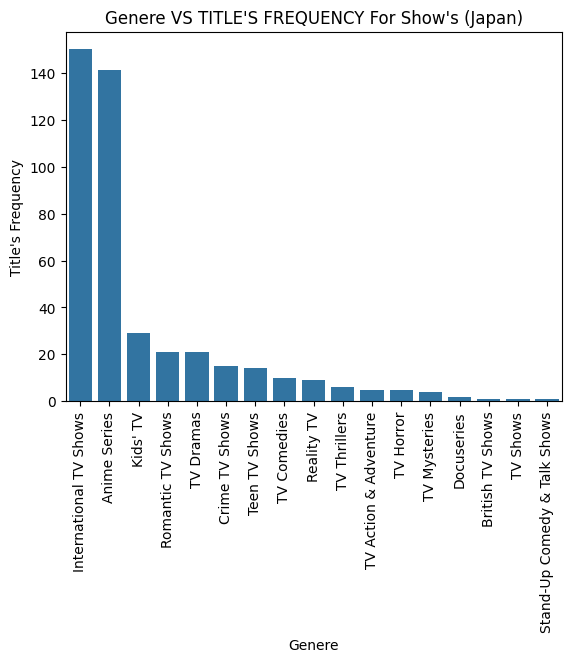

In [ ]:
sns.barplot(data=a,x="Genere",y="Title")
plt.xlabel("Genere")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Genere VS TITLE'S FREQUENCY For Show's (Japan)")
plt.show()

In [ ]:
#Top 3 Genere's In Japan(Shows) are:
                                    # International TV Shows
                                    # Anime Series
                                    # Kids' TV

In [ ]:
b=data_japan_movies.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
b=pd.DataFrame(b)
b

Title
Genere                         
International Movies         72
Anime Features               61
Action & Adventure           57
Dramas                       23
Children & Family Movies     19
Sci-Fi & Fantasy              9
Comedies                      9
Romantic Movies               7
Independent Movies            7
Documentaries                 7
Music & Musicals              6
Thrillers                     5
Horror Movies                 4
Classic Movies                3
Movies                        2
LGBTQ Movies                  1
Cult Movies                   1
Sports Movies                 1

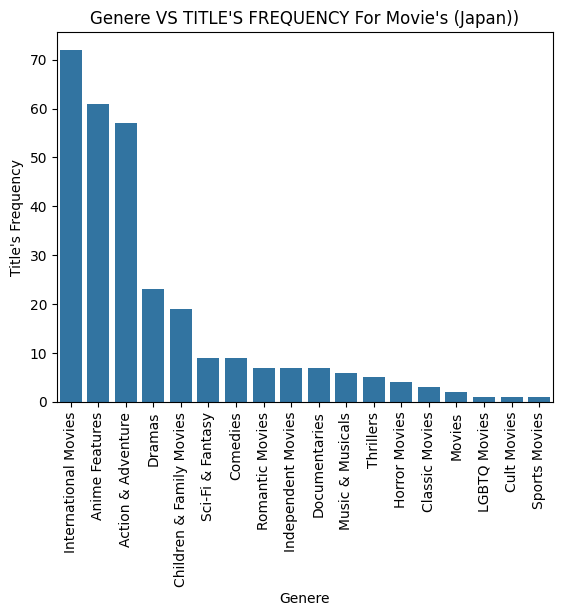

In [ ]:
sns.barplot(data=b,x="Genere",y="Title")
plt.xlabel("Genere")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Genere VS TITLE'S FREQUENCY For Movie's (Japan))")
plt.show()

In [ ]:
#Top 3 Genere's In Japan(Shows) are
                                  # International Movies
                                  # Anime Features
                                  # Action & Adventure

In [ ]:
c=data_japan_movies.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
c=pd.DataFrame(c)
c

Title
Rating       
TV-MA      32
TV-PG      28
TV-14      23
PG         11
PG-13       9
R           9
TV-Y7       5
G           1
TV-Y        1

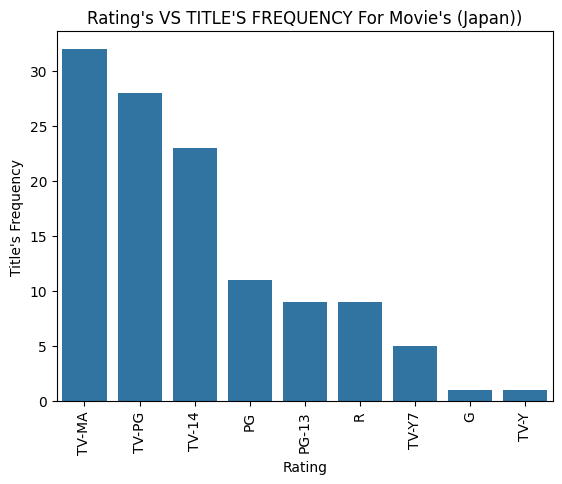

In [ ]:
sns.barplot(data=c,x="Rating",y="Title")
plt.xlabel("Rating")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Rating's VS TITLE'S FREQUENCY For Movie's (Japan))")
plt.show()

In [ ]:
# Top 3 Ratings for Movies In Japan
                                    # TV-MA	32
                                    # TV-PG	28
                                    # TV-14

In [ ]:
d=data_japan_shows.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
d=pd.DataFrame(d)
d

Title
Rating       
TV-14      75
TV-MA      69
TV-Y7      27
TV-PG      22
TV-G        2
TV-Y        2

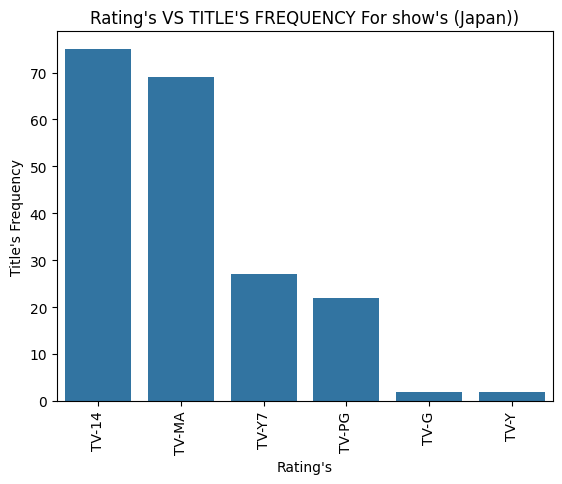

In [ ]:
sns.barplot(data=d,x="Rating",y="Title")
plt.xlabel("Rating's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Rating's VS TITLE'S FREQUENCY For show's (Japan))")
plt.show()

In [ ]:
# Top 3 Ratings for Show's In Japan
                                  # TV-14
                                  # TV-MA
                                  # TV-Y7

In [ ]:
e=data_japan_shows.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Actor                  
Takahiro Sakurai     22
Yuki Kaji            18
Daisuke Ono          17
Junichi Suwabe       16
Yoshimasa Hosoya     15
...                 ...
Kiyofumi Kaneko       1
Kiyono Yasuno         1
Kiyoshi Kawakubo      1
Kiyoyuki Yanada       1
Yuzuru Fujimoto       1

[1206 rows x 1 columns]

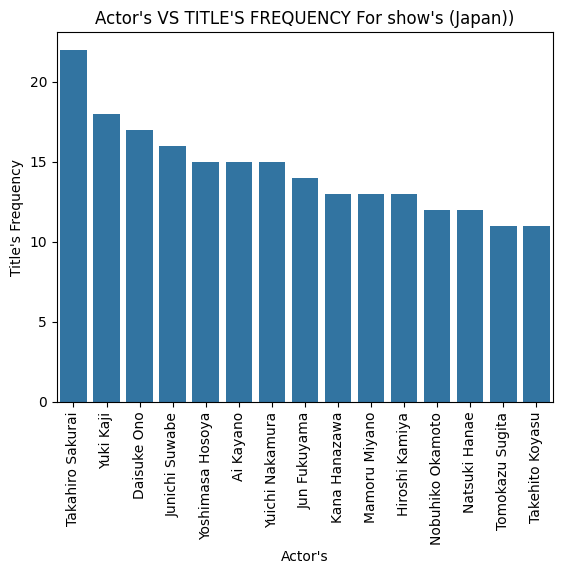

In [ ]:
sns.barplot(data=e[:15],x="Actor",y="Title")
plt.xlabel("Actor's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Actor's VS TITLE'S FREQUENCY For show's (Japan))")
plt.show()

In [ ]:
#Top 5 Actor's(show's) In Japan are
                                  # Takahiro Sakurai
                                  # Yuki Kaji
                                  # Daisuke Ono
                                  # Junichi Suwabe
                                  # Yoshimasa Hosoya

In [ ]:
e=data_japan_movies.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Actor                 
Yuki Kaji           10
Chie Nakamura        9
Junko Takeuchi       9
Minako Kotobuki      8
Houko Kuwashima      8
...                ...
Jun Fukuyama         1
Jun Jong-seo         1
Jun Karasawa         1
Jun Kunimura         1
Zhang Ziyi           1

[807 rows x 1 columns]

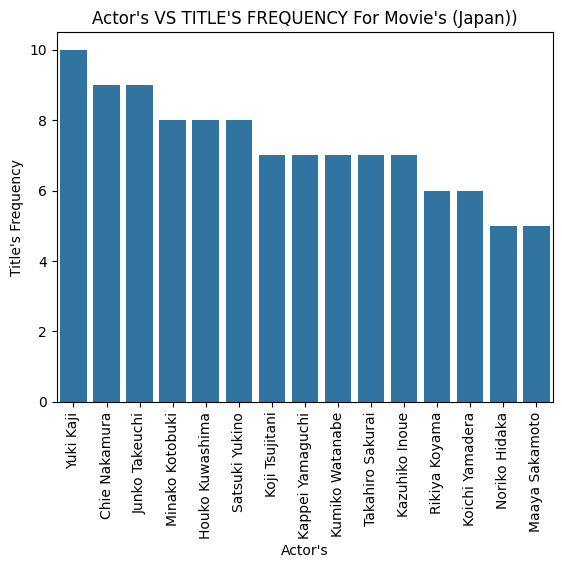

In [ ]:
sns.barplot(data=e[:15],x="Actor",y="Title")
plt.xlabel("Actor's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Actor's VS TITLE'S FREQUENCY For Movie's (Japan))")
plt.show()

In [ ]:
#Top 5 Actor's(Movie's) In Japan are
                                    # Yuki Kaji
                                    # Chie Nakamura
                                    # Junko Takeuchi
                                    # Minako Kotobuki
                                    # Houko Kuwashima

In [ ]:
e=data_japan_movies.groupby("Director")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Director                
Toshiya Shinohara      7
Masahiko Murata        5
Shigeaki Kubo          4
Kazuchika Kise         3
Toshiyuki Kubooka      3
...                  ...
Kazuya Tsurumaki       1
Junichi Sato           1
Joseph Chou            1
Joel Coen              1
Yuki Yamato            1

[122 rows x 1 columns]

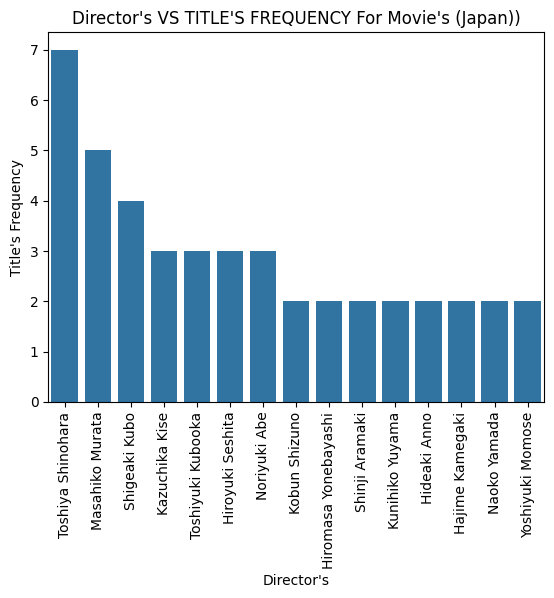

In [ ]:
sns.barplot(data=e[:15],x="Director",y="Title")
plt.xlabel("Director's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director's VS TITLE'S FREQUENCY For Movie's (Japan))")
plt.show()

In [ ]:
#Top 5 Actor's(Movie's) In Japan are
                                    # Toshiya Shinohara
                                    # Masahiko Murata
                                    # Shigeaki Kubo
                                    # Kazuchika Kise
                                    # Toshiyuki Kubooka

In [ ]:
e=data_japan_shows.groupby("Director")["Title"].nunique().sort_values(ascending=False)
e=e[e.index != "Unknown Director"]
e=pd.DataFrame(e)
e

Title
Director                       
Caroline Sá                   1
Chico Pereira                 1
Tsutomu Mizushima             1
Thomas Astruc                 1
Tensai Okamura                1
Takuya Igarashi               1
Sion Sono                     1
Moyoung Jin                   1
Masaaki Yuasa                 1
Kobun Shizuno                 1
Kazuya Murata                 1
Hiroyuki Seshita              1
Hikaru Toda                   1
Hayato Date                   1
Go Koga                       1
Fahad Mustafa                 1
Elaine McMillion Sheldon      1
Deepti Kakkar                 1
Yasuhiro Irie                 1

In [ ]:
sns.barplot(data=e[:15],x="Director",y="Title")
plt.xlabel("Director's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director's VS TITLE'S FREQUENCY For Show's (Japan))")
plt.show()

In [ ]:
#In Japan Maximum Director's(Show's) Were Having  1 Title Only

In [ ]:
e=data_japan_shows.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Year_added       
2020           48
2019           45
2018           31
2021           29
2016           23
2017           20
2015            1

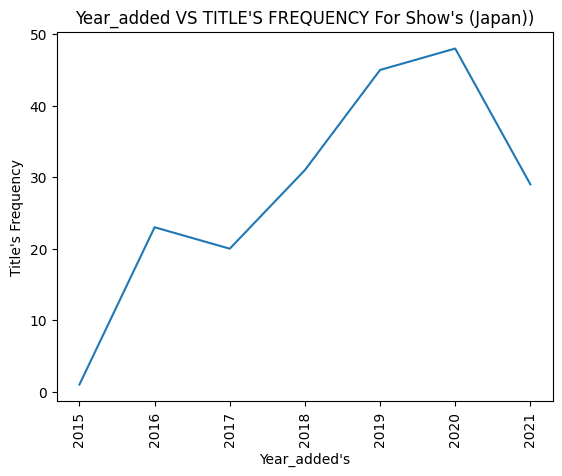

In [ ]:
sns.lineplot(data=e,x="Year_added",y="Title")
plt.xlabel("Year_added's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Year_added VS TITLE'S FREQUENCY For Show's (Japan))")
plt.show()

In [ ]:
# In Japan, TV Shows Addition have Declined From 2016 from 2017 and then Increased till 2020 after which It Has Reduced in 2021.

In [ ]:
e=data_japan_movies.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Year_added       
2020           31
2019           29
2021           24
2017           17
2018           13
2016            5

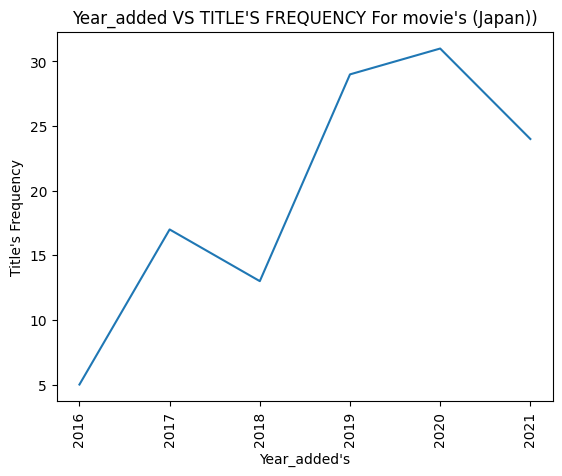

In [ ]:
sns.lineplot(data=e,x="Year_added",y="Title")
plt.xlabel("Year_added's")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Year_added VS TITLE'S FREQUENCY For movie's (Japan))")
plt.show()

In [ ]:
# In Japan, Movie's  Addition have Declined in 2017 from 2018 and then Increased till 2020 after which It Has Reduced in 2020.

In [ ]:
e=data_japan_movies.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Month_added       
9               30
12              14
4               11
6               11
1                9
11               8
2                7
3                7
5                6
10               6
7                5
8                5

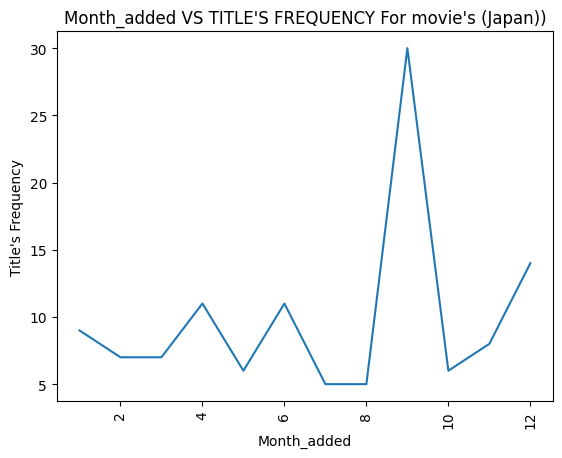

In [ ]:
sns.lineplot(data=e,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Month_added VS TITLE'S FREQUENCY For movie's (Japan))")
plt.show()

In [ ]:
#In Japan September Is The Best Month To Add Movies Content In NetFlix

In [ ]:
e=data_japan_shows.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Month_added       
12              24
6               23
1               21
4               18
11              18
7               17
3               15
8               15
9               13
2               11
5               11
10              11

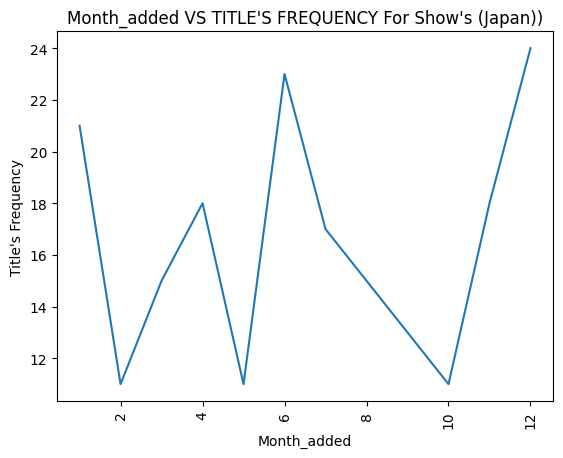

In [ ]:
sns.lineplot(data=e,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Month_added VS TITLE'S FREQUENCY For Show's (Japan))")
plt.show()

In [ ]:
#In Japan September Is The Best Month's To Add Shows_Content In NetFlix Are 1st,6th,12th

In [ ]:
e=data_japan_shows.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Week_added       
1               9
18              8
44              8
27              8
53              8
51              7
48              7
22              7
5               6
50              6
35              6
45              5
40              5
31              5
24              5
29              5
13              5
15              5
12              5
9               4
23              4
25              4
3               4
11              4
14              4
33              4
20              3
52              3
46              3
41              3
39              3
36              3
6               3
28              3
26              3
34              2
37              2
38              2
32              2
30              2
49              2
21              2
17              2
7               1
4               1
47              1
10              1
16              1
8               1

In [ ]:
sns.lineplot(data=e,x="Week_added",y="Title")
plt.xlabel("Week_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Week_added VS TITLE'S FREQUENCY For Show's (Japan))")
plt.show()

In [ ]:
e=data_japan_movies.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Week_added       
37             14
35              7
38              6
1               5
8               5
52              5
41              4
25              3
46              3
23              3
3               3
39              3
18              3
13              3
51              3
11              3
26              3
47              2
48              2
31              2
44              2
50              2
36              2
32              2
9               2
20              2
12              2
14              2
15              2
24              2
16              2
29              2
19              1
49              1
17              1
45              1
10              1
21              1
22              1
5               1
7               1
34              1
33              1
2               1
30              1

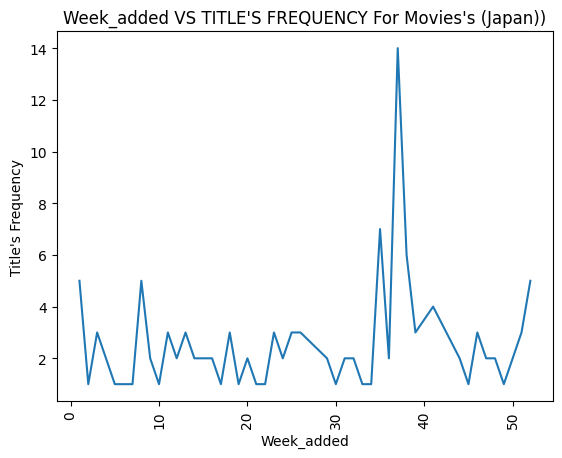

In [ ]:
sns.lineplot(data=e,x="Week_added",y="Title")
plt.xlabel("Week_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Week_added VS TITLE'S FREQUENCY For Movies's (Japan))")
plt.show()

In [ ]:
#Analysing The South-Korea Data

In [ ]:
data_sk_movies=data[(data["Country"] == "South Korea") & (data["type"] == "Movie")]
data_sk_movies

show_id   type           Title      Director         Actor      Country  \
555     s556  Movie     Snowpiercer  Bong Joon Ho   Chris Evans  South Korea   
555     s556  Movie     Snowpiercer  Bong Joon Ho   Chris Evans  South Korea   
555     s556  Movie     Snowpiercer  Bong Joon Ho   Chris Evans  South Korea   
555     s556  Movie     Snowpiercer  Bong Joon Ho  Song Kang-ho  South Korea   
555     s556  Movie     Snowpiercer  Bong Joon Ho  Song Kang-ho  South Korea   
...      ...    ...             ...           ...           ...          ...   
8613   s8614  Movie  Train to Busan  Sang-ho Yeon         Sohee  South Korea   
8613   s8614  Movie  Train to Busan  Sang-ho Yeon         Sohee  South Korea   
8613   s8614  Movie  Train to Busan  Sang-ho Yeon  Eui-sung Kim  South Korea   
8613   s8614  Movie  Train to Busan  Sang-ho Yeon  Eui-sung Kim  South Korea   
8613   s8614  Movie  Train to Busan  Sang-ho Yeon  Eui-sung Kim  South Korea   

          Date_added  release_year Rating Duration                Genere  \
555     July 2, 2021          2013      R  121-150    Action & Adventure   
555     July 2, 2021          2013      R  121-150           Cult Movies   
555     July 2, 2021          2013      R  121-150  International Movies   
555     July 2, 2021          2013      R  121-150    Action & Adventure   
555     July 2, 2021          2013      R  121-150           Cult Movies   
...              ...           ...    ...      ...                   ...   
8613  March 18, 2017          2016  TV-MA  101-120         Horror Movies   
8613  March 18, 2017          2016  TV-MA  101-120  International Movies   
8613  March 18, 2017          2016  TV-MA  101-120    Action & Adventure   
8613  March 18, 2017          2016  TV-MA  101-120         Horror Movies   
8613  March 18, 2017          2016  TV-MA  101-120  International Movies   

                                            Description Modified_Date_Added  \
555   The Earth's remaining inhabitants are confined...          2021-07-02   
555   The Earth's remaining inhabitants are confined...          2021-07-02   
555   The Earth's remaining inhabitants are confined...          2021-07-02   
555   The Earth's remaining inhabitants are confined...          2021-07-02   
555   The Earth's remaining inhabitants are confined...          2021-07-02   
...                                                 ...                 ...   
8613  As a zombie outbreak sweeps the country, a dad...          2017-03-18   
8613  As a zombie outbreak sweeps the country, a dad...          2017-03-18   
8613  As a zombie outbreak sweeps the country, a dad...          2017-03-18   
8613  As a zombie outbreak sweeps the country, a dad...          2017-03-18   
8613  As a zombie outbreak sweeps the country, a dad...          2017-03-18   

      Year_added  Month_added  Week_added  
555         2021            7          26  
555         2021            7          26  
555         2021            7          26  
555         2021            7          26  
555         2021            7          26  
...          ...          ...         ...  
8613        2017            3          11  
8613        2017            3          11  
8613        2017            3          11  
8613        2017            3          11  
8613        2017            3          11  

[1289 rows x 16 columns]

In [ ]:
data_sk_shows=data[(data["Country"] == "South Korea") & (data["type"] == "TV Show")]
data_sk_shows

show_id     type                        Title          Director  \
104     s105  TV Show          Tayo the Little Bus  Unknown Director   
104     s105  TV Show          Tayo the Little Bus  Unknown Director   
104     s105  TV Show          Tayo the Little Bus  Unknown Director   
104     s105  TV Show          Tayo the Little Bus  Unknown Director   
124     s125  TV Show  Pororo - The Little Penguin  Unknown Director   
...      ...      ...                          ...               ...   
8797   s8798  TV Show                    Zak Storm  Unknown Director   
8797   s8798  TV Show                    Zak Storm  Unknown Director   
8797   s8798  TV Show                    Zak Storm  Unknown Director   
8797   s8798  TV Show                    Zak Storm  Unknown Director   
8797   s8798  TV Show                    Zak Storm  Unknown Director   

                        Actor      Country          Date_added  release_year  \
104               Robyn Slade  South Korea   September 6, 2021          2016   
104               Robyn Slade  South Korea   September 6, 2021          2016   
104             Kami Desilets  South Korea   September 6, 2021          2016   
104             Kami Desilets  South Korea   September 6, 2021          2016   
124              Unknown_cast  South Korea   September 2, 2021          2013   
...                       ...          ...                 ...           ...   
8797  Christine Marie Cabanos  South Korea  September 13, 2018          2016   
8797        Christopher Smith  South Korea  September 13, 2018          2016   
8797            Max Mittelman  South Korea  September 13, 2018          2016   
8797                Reba Buhr  South Korea  September 13, 2018          2016   
8797              Kyle Hebert  South Korea  September 13, 2018          2016   

     Rating   Duration           Genere  \
104    TV-Y  2 Seasons         Kids' TV   
104    TV-Y  2 Seasons  Korean TV Shows   
104    TV-Y  2 Seasons         Kids' TV   
104    TV-Y  2 Seasons  Korean TV Shows   
124   TV-Y7  3 Seasons         Kids' TV   
...     ...        ...              ...   
8797  TV-Y7  3 Seasons         Kids' TV   
8797  TV-Y7  3 Seasons         Kids' TV   
8797  TV-Y7  3 Seasons         Kids' TV   
8797  TV-Y7  3 Seasons         Kids' TV   
8797  TV-Y7  3 Seasons         Kids' TV   

                                            Description Modified_Date_Added  \
104   As they learn their routes around the busy cit...          2021-09-06   
104   As they learn their routes around the busy cit...          2021-09-06   
104   As they learn their routes around the busy cit...          2021-09-06   
104   As they learn their routes around the busy cit...          2021-09-06   
124   On a tiny island, Pororo the penguin has fun a...          2021-09-02   
...                                                 ...                 ...   
8797  Teen surfer Zak Storm is mysteriously transpor...          2018-09-13   
8797  Teen surfer Zak Storm is mysteriously transpor...          2018-09-13   
8797  Teen surfer Zak Storm is mysteriously transpor...          2018-09-13   
8797  Teen surfer Zak Storm is mysteriously transpor...          2018-09-13   
8797  Teen surfer Zak Storm is mysteriously transpor...          2018-09-13   

      Year_added  Month_added  Week_added  
104         2021            9          36  
104         2021            9          36  
104         2021            9          36  
104         2021            9          36  
124         2021            9          35  
...          ...          ...         ...  
8797        2018            9          37  
8797        2018            9          37  
8797        2018            9          37  
8797        2018            9          37  
8797        2018            9          37  

[3754 rows x 16 columns]

In [ ]:
e=data_sk_movies.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Genere                         
International Movies         44
Dramas                       26
Action & Adventure           17
Comedies                     17
Thrillers                    14
Children & Family Movies     10
Horror Movies                 5
Sci-Fi & Fantasy              5
Documentaries                 2
Independent Movies            2
Romantic Movies               2
Stand-Up Comedy               2
Cult Movies                   1
LGBTQ Movies                  1
Movies                        1
Music & Musicals              1

In [ ]:
sns.barplot(data=e,x="Genere",y="Title")
plt.xlabel("Genere")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Genere VS TITLE'S FREQUENCY For Movie's (South-korea))")
plt.show()

In [ ]:
#Top 3 Genere's For Movies in South Korea are
                                            # International Movies
                                            # Dramas
                                            # Action & Adventure

In [ ]:
e=data_sk_shows.groupby("Genere")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Genere                             
International TV Shows          152
Korean TV Shows                 132
Romantic TV Shows                77
TV Dramas                        38
Crime TV Shows                   24
TV Comedies                      19
Kids' TV                         16
TV Action & Adventure             9
Reality TV                        4
Stand-Up Comedy & Talk Shows      4
TV Horror                         3
TV Mysteries                      3
TV Thrillers                      1

In [ ]:
sns.barplot(data=e,x="Genere",y="Title")
plt.xlabel("Genere")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Genere VS TITLE'S FREQUENCY For Show's (South-korea))")
plt.show()

In [ ]:
#Top 3 Genere's For The Show's In south Korea are
                                                  # International TV Shows
                                                  # Korean TV Shows
                                                  # Romantic TV Shows

In [ ]:
e=data_sk_shows.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Rating       
TV-14      82
TV-MA      55
TV-PG      15
TV-Y7       9
TV-Y        8
TV-G        1

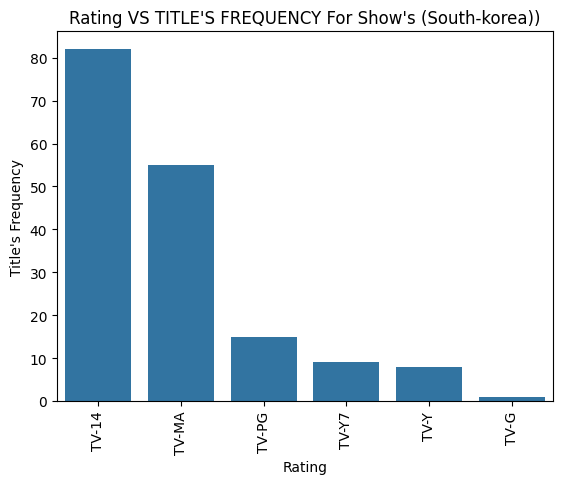

In [ ]:
sns.barplot(data=e,x="Rating",y="Title")
plt.xlabel("Rating")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Rating VS TITLE'S FREQUENCY For Show's (South-korea))")
plt.show()

In [ ]:
#Top 3 Rating's For The Show's In South-Korea
                                                # TV-14
                                                # TV-MA
                                                # TV-PG

In [ ]:
e=data_sk_movies.groupby("Rating")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Rating       
TV-MA      37
TV-Y7       5
NR          4
TV-14       4
TV-PG       4
PG          2
R           2
G           1
PG-13       1
TV-Y        1

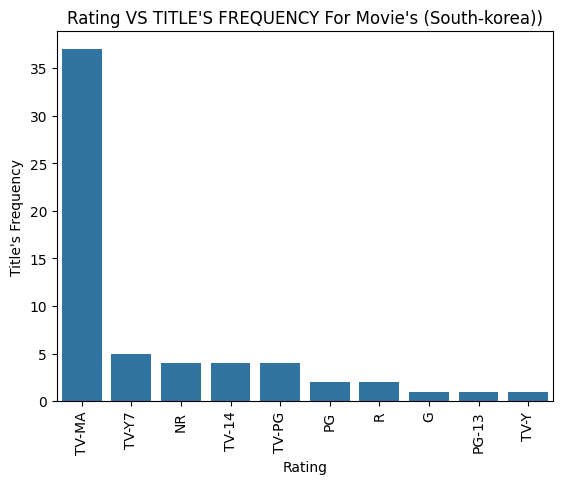

In [ ]:
sns.barplot(data=e,x="Rating",y="Title")
plt.xlabel("Rating")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Rating VS TITLE'S FREQUENCY For Movie's (South-korea))")
plt.show()

In [ ]:
#In South Korea Majority Of Movies Having TV-MA Rating

In [ ]:
e=data_sk_movies.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Actor                  
Kyeong-yeong Lee      4
Eui-sung Kim          3
Wally Wingert         3
Park Hae-joon         3
Do-won Kwak           3
...                 ...
Jang Dong-gun         1
Jamie Bell            1
James Rankin          1
James Franco          1
Zoe Graham            1

[431 rows x 1 columns]

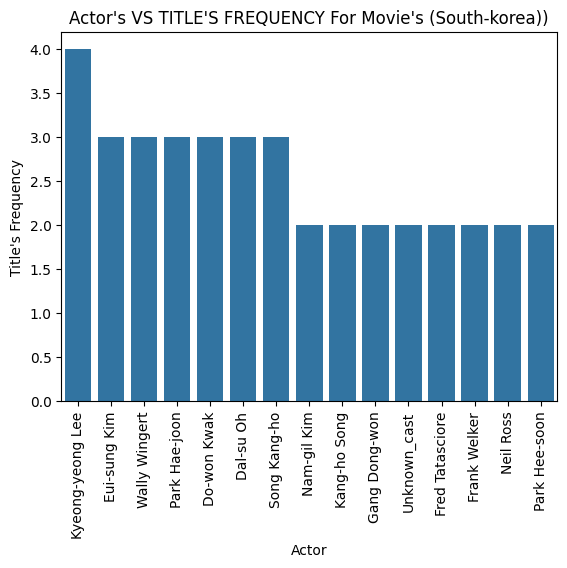

In [ ]:
sns.barplot(data=e[:15],x="Actor",y="Title")
plt.xlabel("Actor")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Actor's VS TITLE'S FREQUENCY For Movie's (South-korea))")
plt.show()

In [ ]:
#Top 5 Actor's (Movie's) In South Korea
                                      # Kyeong-yeong Lee
                                      # Eui-sung Kim
                                      # Wally Wingert
                                      # Park Hae-joon
                                      # Do-won Kwak

In [ ]:
e=data_sk_shows.groupby("Actor")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Actor               
Sung Dong-il       5
Kim Won-hae        5
Cho Seong-ha       5
Kim Sun-young      4
Lee Il-hwa         4
...              ...
Jung Eugene        1
Jung Eun Kim       1
Jung Ga-ram        1
Jung Han-bi        1
Zo In-sung         1

[1061 rows x 1 columns]

In [ ]:
sns.barplot(data=e[:15],x="Actor",y="Title")
plt.xlabel("Actor")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Actor's VS TITLE'S FREQUENCY For Show's (South-korea))")
plt.show()

In [ ]:
#Top 5 Actor's (Show's) In South Korea are
                                          # Sung Dong-il
                                          # Kim Won-hae
                                          # Cho Seong-ha
                                          # Kim Sun-young
                                          # Lee Il-hwa

In [ ]:
e=data_sk_movies.groupby("Director")["Title"].nunique().sort_values(ascending=False)
e=e[e.index != "Unknown Director"]
e=pd.DataFrame(e)
e

Title
Director                   
Bong Joon Ho              2
Mark A.Z. Dippé           2
Park Hoon-jung            2
Sang-ho Yeon              2
Aaron Woodley             1
Scott Christian Sava      1
Lee Jeong-beom            1
Lee Kae-byeok             1
Lee Seung-won             1
Meltem Bozoflu            1
Na Hyeon                  1
Park In-je                1
Peter Lepeniotis          1
Raymie Muzquiz            1
Richard Finn              1
Shin-yeon Won             1
Lee Chang-dong            1
Stu Livingston            1
Sung Do-jun               1
Sung-soo Kim              1
Thomas Astruc             1
Tim Maltby                1
Tony Bancroft             1
Ui-seok Jo                1
Woo Min-ho                1
Y. Joon Chung             1
Yang Woo-seok             1
Yoon Sung-hyun            1
Lee Chung-hyun            1
Kim Tae-hyung             1
Adam Sjöberg              1
Kim Sung-hoon             1
Ahn Byoung-wook           1
Benson Lee                1
Billy Ray                 1
Byeon Hee-sun             1
Byun Hyuk                 1
Chan-sang Lim             1
Cho Il                    1
Choi Jin-seong            1
Dejan Zečević             1
Edwin                     1
Eondeok Han               1
Geun-hyun Cho             1
Hang-Jun Jang             1
Hong-seon Kim             1
Jang Jae-hyun             1
Jee-woon Kim              1
Jo Sung-hee               1
John H. Lee               1
Jun-seong Kim             1
Jung Ji-woo               1
Jung-woo Park             1
Kazuaki Kiriya            1
Kim Dong-kyu              1
Kim Jee-woon              1
Kim Joo-hyung             1
You-Jeong Chang           1

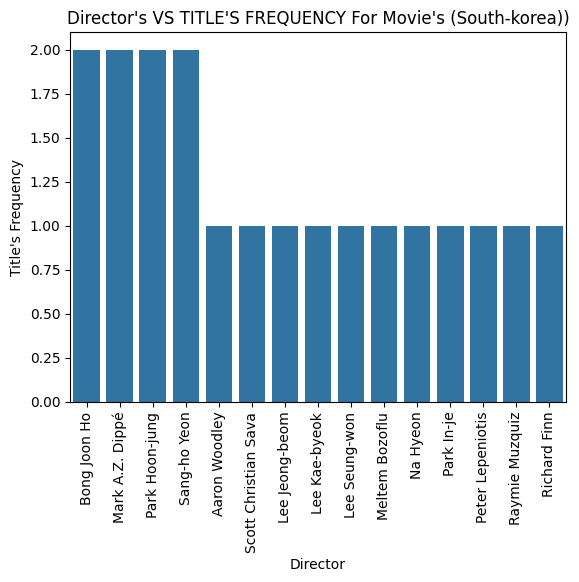

In [ ]:
sns.barplot(data=e[:15],x="Director",y="Title")
plt.xlabel("Director")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director's VS TITLE'S FREQUENCY For Movie's (South-korea))")
plt.show()

In [ ]:
#Top 5 Director's (Movies) In South-Korea
                                        # Bong Joon Ho
                                        # Mark A.Z. Dippé
                                        # Park Hoon-jung
                                        # Sang-ho Yeon
                                        # Aaron Woodley

In [ ]:
e=data_sk_shows.groupby("Director")["Title"].nunique().sort_values(ascending=False)
e=e[e.index != "Unknown Director"]
e=pd.DataFrame(e)
e

Title
Director            
Jung-ah Im         2
Shin Won-ho        2
Chang-Min Lee      1
Hong Won-ki        1
Jeon Go-woon       1
Kim Jong-kwan      1
Kim Seong-hun      1
Lee Eung-bok       1
Lee Kyoungmi       1
Lee Yoon-jung      1
Park Joon-hwa      1
Seung-uk Jo        1
Thomas Astruc      1
Yim Pilsung        1

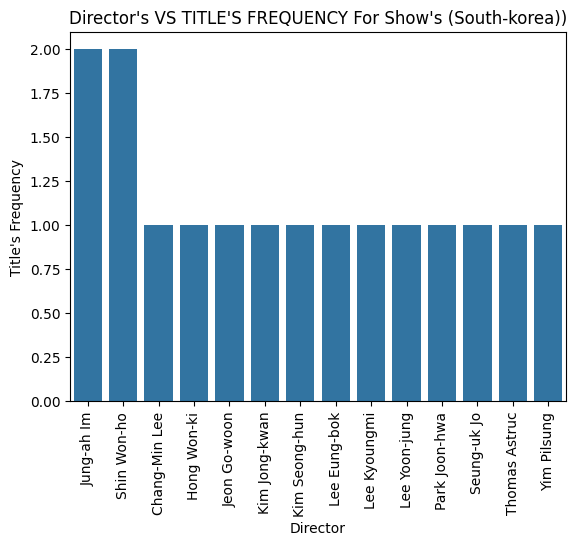

In [ ]:
sns.barplot(data=e[:15],x="Director",y="Title")
plt.xlabel("Director")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Director's VS TITLE'S FREQUENCY For Show's (South-korea))")
plt.show()

In [ ]:
#Top 5 Director's (Show's) In South-Korea
                                        # ung-ah Im
                                        # Shin Won-ho
                                        # Chang-Min Lee
                                        # Hong Won-ki
                                        # Jeon Go-woon

In [ ]:
e=data_sk_shows.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Year_added       
2019           45
2020           44
2017           32
2021           21
2018           18
2016           10

In [ ]:
sns.lineplot(data=e,x="Year_added",y="Title")
plt.xlabel("Year_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Year_added VS TITLE'S FREQUENCY For Show's (South-korea))")
plt.show()

In [ ]:
#In South Korea show's addition was steadty Incresing untill 2017 and started decline from 2018 - 2020 steadty Incresing The started Down Treand

In [ ]:
e=data_sk_movies.groupby("Year_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Year_added       
2018           15
2019           14
2020           12
2017           11
2021            8
2016            1

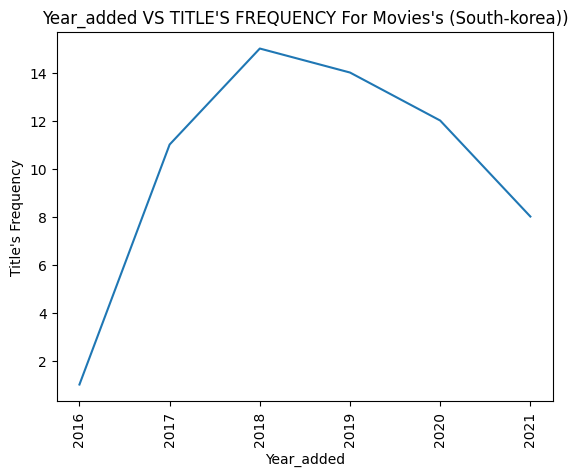

In [ ]:
sns.lineplot(data=e,x="Year_added",y="Title")
plt.xlabel("Year_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Year_added VS TITLE'S FREQUENCY For Movies's (South-korea))")
plt.show()

In [ ]:
#In South Korea show's addition was steadty Incresing untill 2018 and started Down Treand

In [ ]:
e=data_sk_movies.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Week_added       
5               5
1               4
11              3
26              3
2               3
22              3
39              3
17              3
8               3
9               2
18              2
42              2
3               2
30              2
33              2
37              2
50              1
48              1
46              1
45              1
44              1
51              1
41              1
24              1
31              1
25              1
21              1
19              1
15              1
14              1
13              1
7               1
53              1

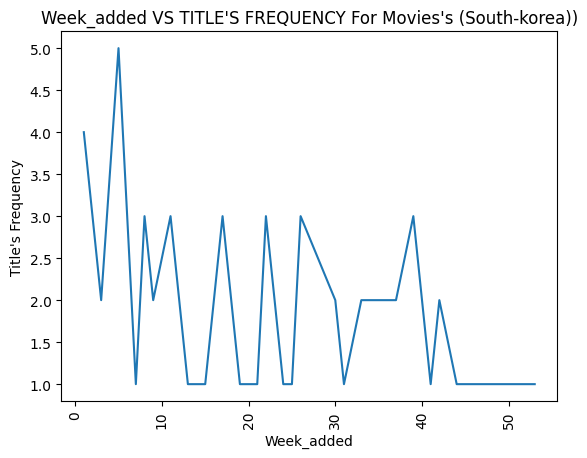

In [ ]:
sns.lineplot(data=e,x="Week_added",y="Title")
plt.xlabel("Week_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Week_added VS TITLE'S FREQUENCY For Movies's (South-korea))")
plt.show()

In [ ]:
e=data_sk_shows.groupby("Week_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Week_added       
50             11
23             10
21              9
40              8
1               7
7               7
32              7
15              5
48              5
27              5
8               5
44              4
31              4
17              4
18              4
20              4
10              4
5               4
46              4
41              3
28              3
42              3
26              3
37              3
49              3
11              3
35              2
51              2
39              2
52              2
38              2
47              2
12              2
34              2
24              2
14              2
13              2
16              2
19              2
4               1
22              1
9               1
45              1
36              1
25              1
3               1
29              1
6               1
30              1
33              1
53              1

In [ ]:
sns.lineplot(data=e,x="Week_added",y="Title")
plt.xlabel("Week_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Week_added VS TITLE'S FREQUENCY For show's (South-korea))")
plt.show()

In [ ]:
e=data_sk_movies.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Month_added       
1               11
2               10
4                7
6                5
10               5
5                4
7                4
11               4
3                3
8                3
9                3
12               2

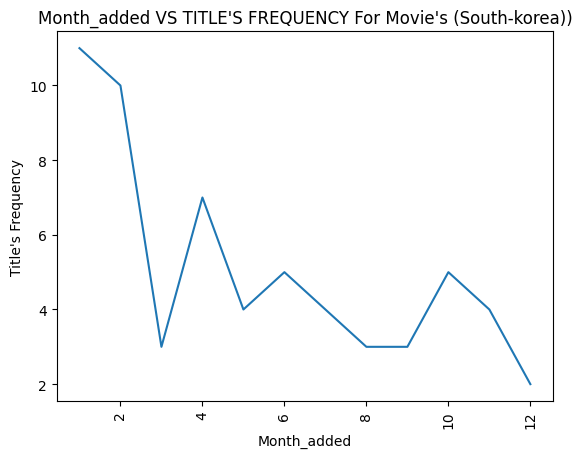

In [ ]:
sns.lineplot(data=e,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Month_added VS TITLE'S FREQUENCY For Movie's (South-korea))")
plt.show()

In [ ]:
e=data_sk_shows.groupby("Month_added")["Title"].nunique().sort_values(ascending=False)
e=pd.DataFrame(e)
e

Title
Month_added       
12              23
5               18
2               16
10              16
6               15
8               15
4               14
3               12
7               12
11              12
9                9
1                8

In [ ]:
sns.lineplot(data=e,x="Month_added",y="Title")
plt.xlabel("Month_added")
plt.xticks(rotation="vertical")
plt.ylabel("Title's Frequency")
plt.title("Month_added VS TITLE'S FREQUENCY For show's (South-korea))")
plt.show()